# Library

In [ ]:

import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
%matplotlib inline

# VIF for linreg
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Normality test
from scipy.stats import shapiro
from scipy.stats import normaltest


# Model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import statsmodels.api as sm 

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# eXplainable AI
!pip install lime
from lime import lime_tabular
!pip install shap
import shap

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Save and Load model
import pickle, os
os.makedirs('file_model', exist_ok=True)

# Ignore warning
import warnings
warnings.filterwarnings("ignore")


# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Normality test
from scipy.stats import shapiro
from scipy.stats import normaltest

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
!pip install category_encoders
import category_encoders as ce


In [ ]:
!pip install squarify

In [ ]:
import squarify 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Problem Statement**

**Problem**

*Syarah.com* adalah perusahaan *marketplace* untuk pembeli mobil dan penjual mobil mengakses *one-stop-solution* untuk melakukan jual-beli mobil atau servis mobil lainnya. *Syarah.com* berpusat di Arab Saudi.

Sebelum analisis, perusahaan e-commerce jual beli mobil bekas *Syarah.com* tidak memiliki harga patokan untuk mobil yang dijual. Jadi, harga yang ditampilkan pada website *Syarah.com* tergantung pada berapa harga yang dipasang oleh penjual. Hal ini menyebabkan banyak kejadian dimana pembeli melihat harga mobil yang ada di website murah, tetapi ketika menghubungi seller, harga nya tidak sesuai dengan yang ada di website. Hal ini membuat pembeli tidak nyaman bertransaksi di website *Syarah.com*. Dengan adanya kasus ini, pembeli seringkali tidak jadi melakukan transksi di *Syarah.com* dan hal ini pula menyebabkan kerugian (*loss opportunity*) bagi perusahaan. Kesimpulannya, pembeli tidak nyaman berbelanja di *Syarah.com*, kemudian pendapatan perusahaan berkurang atau *loss opportunity*.

**Objective**

Dari masalah tersebut, kami sebagai *Data Scientist* perusahaan *Syarah.com* ingin membuat rekomendasi harga untuk penjual mobil jika ingin menjual mobilnya di website *Syarah.com*. Ketika penjual sudah tau berapa harga yang pantas untuk mobil yang mereka jual, mereka akan memasang harga tidak sembarangan. Hal ini pula akan membuat pembeli nyaman berbelanja di *Syarah.com* karena harga yang tertera di website akan lebih tepat dengan apa yang dipasang oleh penjual. Sebagai *Data Scientist*, kami ingin menyelamatkan uang perusahaan *Syarah.com*.

**Importance of Machine Learning Application**

Dalam kasus ini, machine learning dibutuhkan untuk menentukan harga mobil bekas yang akan dijual oleh seller di website. Output yang keluar dapat digunakan sebagai benchmark harga oleh customer ketika ingin membeli mobil dan juga seller bisa membuat range harga untuk mobil yang ingin dijual sehingga ketepatan dalam informasi ini akan dapat meminimalkan **overpricing dan underpricing**. 


Model machine learning yang akan digunakan adalah analisis **supervised learning - regression**.


**Objective for Machine Learning**

Memprediksi rentang harga mobil bekas yang akan dijual oleh seller dan prediksi tersebut bisa digunakan untuk rekomendasi rentang harga yang sebaiknya dijual di website *Syarah.com*.

# Data Understanding

Dataset tersebut berisi 13 kolom dan 8035 record mobil bekas yang dikumpulkan dari syarah.com. Informasi lain mengenai setiap mobil adalah nama merek, model, tahun pembuatan, asal, warna mobil, pilihan, kapasitas mesin, jenis bahan bakar, jenis transmisi, harga, dan jarak tempuh. Dengan menggunakan model regresi, kita dapat memprediksi harga mobil di Arab Saudi, serta menginterpretasikan fitur apa yang lebih kuat dalam mempengaruhi harga mobil.

**Acknowledgement**

Data yang digunakan dalam analisis kali ini didapat dari Kaggle.com. Data ini merupakan data dari salah satu website jual beli mobil di Saudi Arabia yaitu Syarah.com. Dataset yang digunakan pada analisa kali ini adalah dataset penjualan mobil yang dilakukan oleh Syarah.com.

Link: https://www.kaggle.com/turkibintalib/saudi-arabia-used-cars-dataset

**Data Overview**

| Dataset Statistics     | Count     | Variable Types | Count |
|------------------------|-----------|----------------|-------|
| Number of Variables    | 13        | Numeric        | 4     |
| Number of observations | 8035      | Categorical    | 9     |
| Missing cells          | 0         |                |       |
| Missing cells (%)      | 0%        |                |       |
| Duplicate rows         | 3         |                |       |
| Duplicate rows (%)     | 0.03%     |                |       |
| Total size in memory   | 662.89 kB |                |       |

**Column Explanation**

| No | Feature     | Data Type | Null (%) | Description                      |
|----|-------------|-----------|----------|----------------------------------|
| 1  | Make        | object    | 0        | The car's company name           |
| 2  | Type        | object    | 0        | Type of used car                 |
| 3  | Year        | int64     | 0        | Manufacturing year               |
| 4  | Origin      | object    | 0        | Origin of used car               |
| 5  | Color       | object    | 0        | Color of used car                |
| 6  | Options     | object    | 0        | Options of used car              |
| 7  | Engine_Size | float64   | 0        | The engine size of used car      |
| 8  | Fuel_Type   | object    | 0        | Fuel type size of used car       |
| 9  | Gear_Type   | object    | 0        | Gear type size of used car       |
| 10 | Mileage     | int64     | 0        | The mileage that the car covered |
| 11 | Region      | object    | 0        | Region where the car is located  |
| 12 | Price       | int64     | 0        | The price of used car            |
| 13 | Negotiable  | bool      | 0        | Is the car negotiable or not     |

**Data**

In [ ]:
cars = pd.read_excel('/content/drive/MyDrive/final project/UsedCarsSA_Clean_EN.xlsx')

In [ ]:
cars.sample(5)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
3153,Land Rover,Range Rover,2019.0,Gulf Arabic,White,Full,3.0,Gas,Automatic,49626.0,Riyadh,401500.0,False
6172,Toyota,Camry,2016.0,Gulf Arabic,White,Semi Full,2.5,Gas,Automatic,111.0,Riyadh,49000.0,False
6867,Toyota,Innova,2014.0,Saudi,Silver,Semi Full,2.7,Gas,Automatic,160000.0,Riyadh,0.0,True
7190,Toyota,Furniture,2015.0,Saudi,White,Standard,4.5,Gas,Automatic,10040.0,Makkah,0.0,True
3854,Hyundai,Elantra,2015.0,Saudi,White,Full,2.0,Gas,Automatic,245000.0,Aseer,30000.0,False


**Data Attributes**

In [ ]:
cars.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018.0,Saudi,Black,Full,5.7,Gas,Automatic,103000.0,Riyadh,114000.0,False
1,Nissan,Patrol,2016.0,Saudi,White,Full,4.8,Gas,Automatic,5448.0,Riyadh,0.0,True
2,Nissan,Sunny,2019.0,Saudi,Silver,Standard,1.5,Gas,Automatic,72418.0,Riyadh,27500.0,False
3,Hyundai,Elantra,2019.0,Saudi,Grey,Standard,1.6,Gas,Automatic,114154.0,Riyadh,43000.0,False
4,Hyundai,Elantra,2019.0,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912.0,Riyadh,59500.0,False


In [ ]:
# Melihat data apakah ada missing value dan melihat data type

cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   float64
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   float64
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   float64
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(4), object(8)
memory usage: 761.3+ KB


In [ ]:
cars.describe()

# Descriptive analysis untuk numerical data

,Year,Engine_Size,Mileage,Price
count,8035.000000,8035.000000,8.035000e+03,8.035000e+03
mean,2014.097698,3.287729,1.491488e+05,5.369984e+04
std,5.757228,1.517747,3.474480e+05,7.198472e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,2016.000000,3.000000,1.019600e+05,3.700000e+04
75%,2018.000000,4.400000,1.950000e+05,7.375000e+04
max,2022.000000,9.000000,2.000000e+07,1.150000e+06


In [ ]:
cars[cars['Year'] == 2022]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
523,Changan,Seven,2022.0,Saudi,White,Standard,1.5,Gas,Automatic,460.0,Al-Ahsa,0.0,True
6024,Changan,Seven,2022.0,Saudi,Silver,Standard,1.1,Gas,Automatic,2500.0,Jeddah,0.0,True


Jadi untuk data ini nantinya akan kita drop karena dataset ini discrap 8 bulan yang lalu atau masih di 2021. Jadi kita akan drop data ini nantinya.

In [ ]:
cars.describe(include = 'object')

# Descriptive Analysis berdasarkan categorical data

,Make,Type,Origin,Color,Options,Fuel_Type,Gear_Type,Region
count,8035,8035,8035,8035,8035,8035,8035,8035
unique,59,381,4,15,3,3,2,27
top,Toyota,Land Cruiser,Saudi,White,Full,Gas,Automatic,Riyadh
freq,2038,372,5962,3478,3193,7861,6971,3237


In [ ]:
cars.select_dtypes('object').head()

,Make,Type,Origin,Color,Options,Fuel_Type,Gear_Type,Region
0,Chrysler,C300,Saudi,Black,Full,Gas,Automatic,Riyadh
1,Nissan,Patrol,Saudi,White,Full,Gas,Automatic,Riyadh
2,Nissan,Sunny,Saudi,Silver,Standard,Gas,Automatic,Riyadh
3,Hyundai,Elantra,Saudi,Grey,Standard,Gas,Automatic,Riyadh
4,Hyundai,Elantra,Saudi,Silver,Semi Full,Gas,Automatic,Riyadh


# **Exploratory Data Analysis**

In [ ]:
cars.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018.0,Saudi,Black,Full,5.7,Gas,Automatic,103000.0,Riyadh,114000.0,False
1,Nissan,Patrol,2016.0,Saudi,White,Full,4.8,Gas,Automatic,5448.0,Riyadh,0.0,True
2,Nissan,Sunny,2019.0,Saudi,Silver,Standard,1.5,Gas,Automatic,72418.0,Riyadh,27500.0,False
3,Hyundai,Elantra,2019.0,Saudi,Grey,Standard,1.6,Gas,Automatic,114154.0,Riyadh,43000.0,False
4,Hyundai,Elantra,2019.0,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912.0,Riyadh,59500.0,False


In [ ]:
cars.tail()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
8030,Audi,A6,2015.0,Saudi,Silver,Full,3.0,Gas,Automatic,77000.0,Riyadh,75000.0,False
8031,Chevrolet,Camaro,2010.0,Saudi,Silver,Full,3.6,Gas,Automatic,150000.0,Riyadh,53000.0,False
8032,Toyota,Land Cruiser,2013.0,Gulf Arabic,White,Full,4.6,Gas,Automatic,260.0,Najran,0.0,True
8033,Nissan,Altima,2011.0,Saudi,Silver,Full,2.5,Gas,Automatic,18500.0,Aseer,22000.0,False
8034,Cadillac,Other,2013.0,Saudi,White,Full,3.6,Gas,Automatic,256000.0,Al-Medina,40000.0,False


Text(0, 0.5, 'Count of Cars')

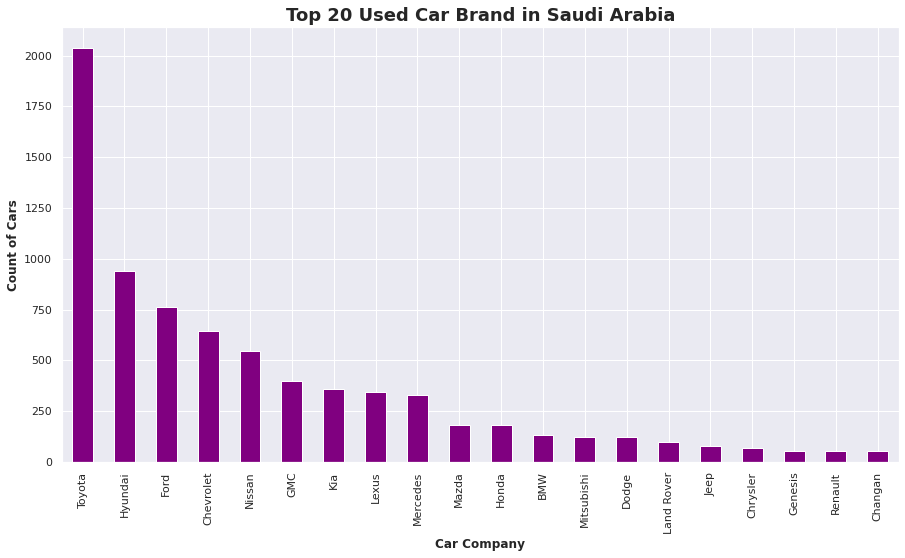

In [ ]:
# Visualizing the different car company names available

plt.rcParams['figure.figsize'] = [15,8]
ax = cars['Make'].value_counts()[0:20].plot(kind='bar', colormap = 'Accent', color = 'Purple')

plt.title("Top 20 Used Car Brand in Saudi Arabia",fontsize=18, fontweight='bold')
plt.xlabel("Car Company",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

Dari chart di atas, 'Toyota' menjadi perusahaan mobil yang penjualannya paling tinggi di website *Syarah.com* diikuti dengan Hyundai dan Ford.

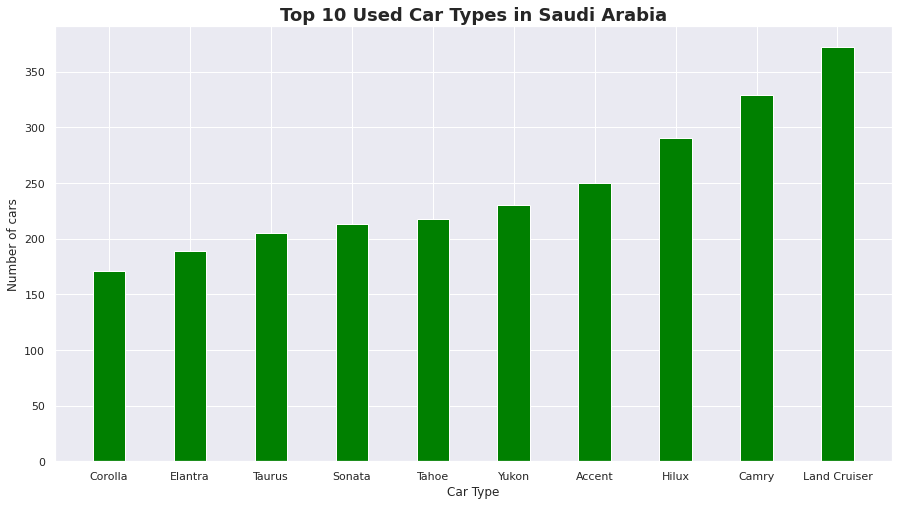

In [ ]:
# Get 10 most common used car type in the dataset
most_common_car_type = cars['Type'].value_counts()[0:10].sort_values()
most_common_car_type.values

#Finding the indices and the values of the 10 most common used cars 
car_type = most_common_car_type.index
counts = most_common_car_type.values

#Determine the figuer width and height
fig = plt.figure(figsize = (15, 8))

# creating the bar plot
plt.bar(car_type, counts, color ='green', width = 0.4)
plt.xlabel("Car Type")
plt.ylabel("Number of cars")
plt.title("Top 10 Used Car Types in Saudi Arabia",fontsize=18, fontweight='bold')
plt.show()

Dari beberapa 'Type' mobil yang terjual, tipe mobil 'Land Cruiser' menjadi yang paling banyak diikuti dengan 'Camry'.

In [ ]:
most_common_car_type

Corolla         171
Elantra         189
Taurus          205
Sonata          213
Tahoe           218
Yukon           230
Accent          250
Hilux           290
Camry           329
Land Cruiser    372
Name: Type, dtype: int64

<Figure size 1440x432 with 0 Axes>

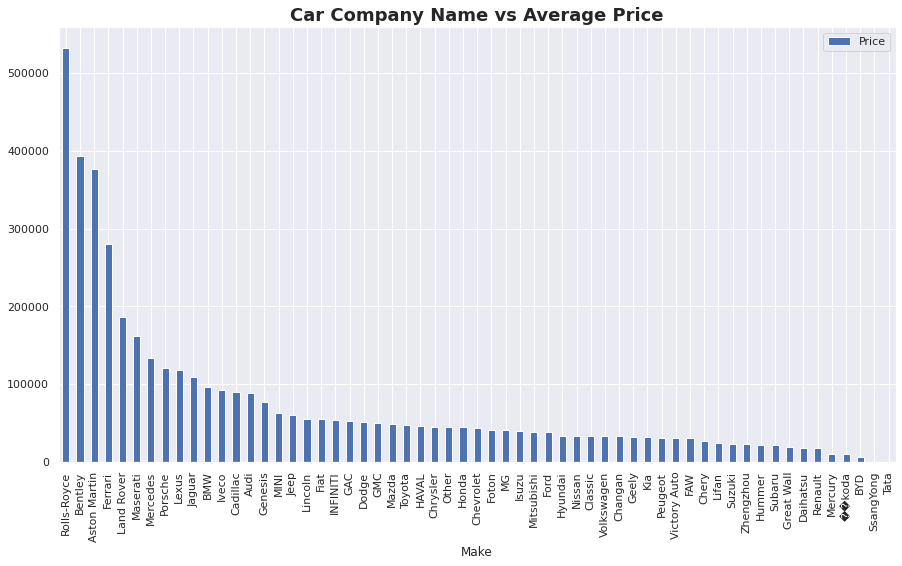

In [ ]:
plt.figure(figsize=(20, 6))

df = pd.DataFrame(cars.groupby(['Make'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Company Name vs Average Price', fontweight = 'bold', fontsize = 18)
plt.show()

Mobil 'Bentley' menjadi company yang menjual mobil dengan rata-rata harga tertinggi disusul oleh 'Aston Martin' dan 'Ferrari'.

In [ ]:
cars

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018.0,Saudi,Black,Full,5.7,Gas,Automatic,103000.0,Riyadh,114000.0,False
1,Nissan,Patrol,2016.0,Saudi,White,Full,4.8,Gas,Automatic,5448.0,Riyadh,0.0,True
2,Nissan,Sunny,2019.0,Saudi,Silver,Standard,1.5,Gas,Automatic,72418.0,Riyadh,27500.0,False
3,Hyundai,Elantra,2019.0,Saudi,Grey,Standard,1.6,Gas,Automatic,114154.0,Riyadh,43000.0,False
4,Hyundai,Elantra,2019.0,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912.0,Riyadh,59500.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015.0,Saudi,Silver,Full,3.0,Gas,Automatic,77000.0,Riyadh,75000.0,False
8031,Chevrolet,Camaro,2010.0,Saudi,Silver,Full,3.6,Gas,Automatic,150000.0,Riyadh,53000.0,False
8032,Toyota,Land Cruiser,2013.0,Gulf Arabic,White,Full,4.6,Gas,Automatic,260.0,Najran,0.0,True
8033,Nissan,Altima,2011.0,Saudi,Silver,Full,2.5,Gas,Automatic,18500.0,Aseer,22000.0,False


<Figure size 1440x432 with 0 Axes>

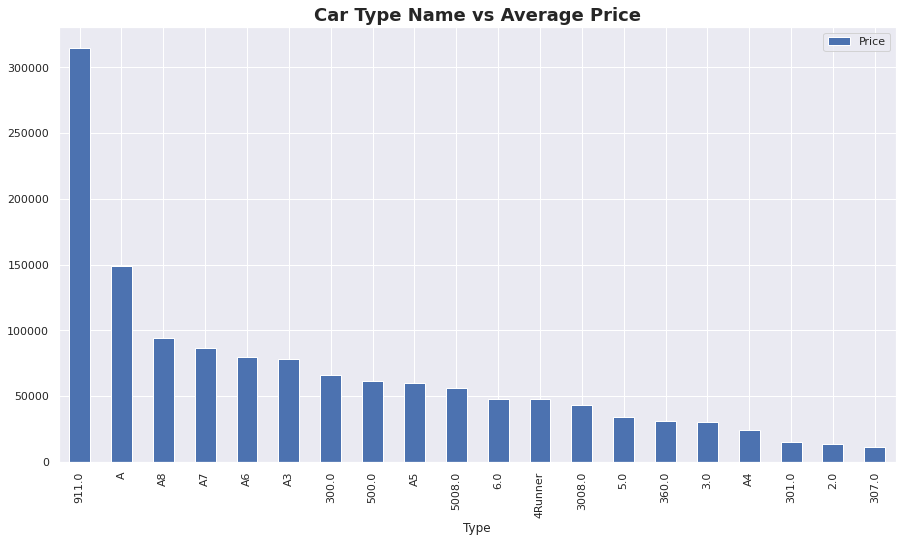

In [ ]:
plt.figure(figsize=(20, 6))

df = pd.DataFrame(cars.groupby(['Type'])['Price'].mean()[:20].sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type Name vs Average Price', fontweight = 'bold', fontsize = 18)
plt.show()

Untuk Tipe mobil, tipe 911 menjadi yang paling tinggi rata-rata harga yang terjual.

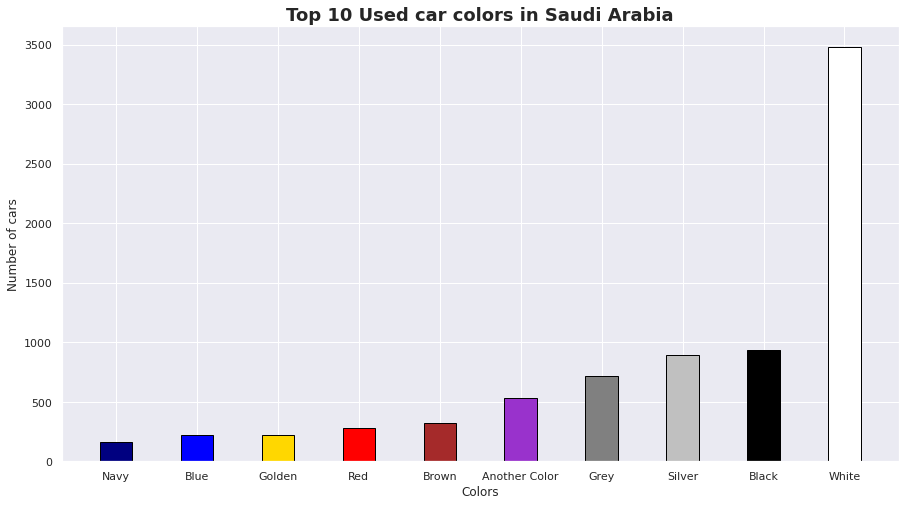

In [ ]:
#Most 10 common used car color in the dataset
most_common_color = cars['Color'].value_counts()[0:10].sort_values()
most_common_color.values

#Finding the indices and the values of the 10 most common used cars colors
car_color = most_common_color.index
counts = most_common_color.values
#Determine the colors  of the bars Because I run it before and I knew the color of each bar
colors= ['Navy', 'blue', 'gold', 'red', 'brown','darkorchid','grey','silver','black','white']
#Determine the figuer width and height
fig = plt.figure(figsize = (15, 8))
# creating the bar plot
plt.bar(car_color, counts, color =colors,width = 0.4, edgecolor = 'black')
plt.xlabel("Colors")
plt.ylabel("Number of cars")
plt.title("Top 10 Used car colors in Saudi Arabia",fontsize=18, fontweight='bold')
plt.show()

Untuk warna mobil, mobil dengan warna putih menjadi mobil yang paling banyak terjual di website *Syarah.com*. Diikuti oleh Hitam dan Silver.

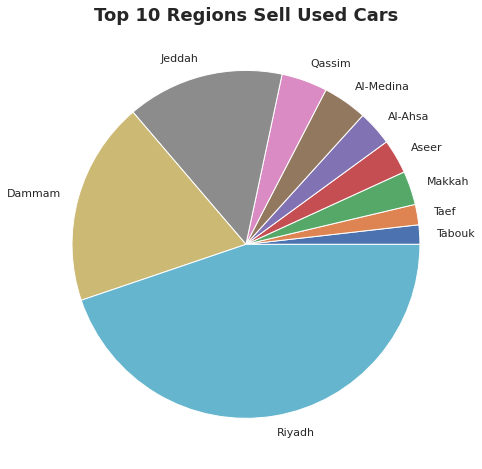

In [ ]:
#Most 10 common regions of Saudi Arabia showed used cars for sale
most_common_region = cars['Region'].value_counts()[0:10].sort_values()
most_common_region.values

#Finding the indices and the values of the 10 most common regions
car_region = most_common_region.index
counts = most_common_region.values
#Determine the figuer width and height
fig = plt.figure(figsize = (15, 8))
#Creating pie chart of the most common regions
plt.title('Top 10 Regions Sell Used Cars',fontsize=18, fontweight='bold')
plt.pie(counts, labels = car_region)

plt.show() 

Dari beberapa region yang ada di Arab Saudi, mobil yang berasal dari Riyadh yang paling banyak terjual di Arab Saudi diikuti oleh Dammam dan Jeddah.

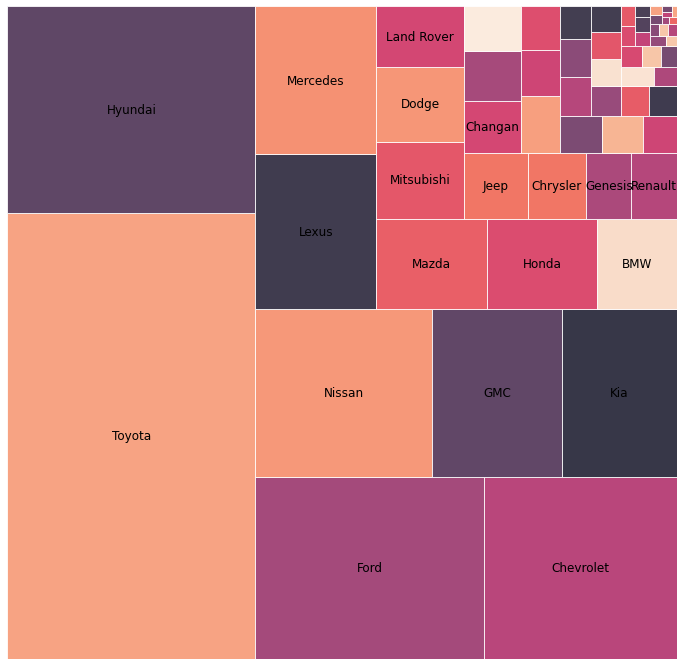

In [ ]:
#Distribution of used car brand in the dataset
most_common_car_brand = cars['Make'].value_counts().sort_values(ascending=False)


#Finding the indices and the values of the all of car brands
car_brand = most_common_car_brand.index
counts = most_common_car_brand.values
#Determine the figure height and width
fig, ax = plt.subplots(1, figsize = (12,12))
#Using Squarify to create a tree map of al car barnds
squarify.plot(sizes=counts,label=car_brand[0:20], alpha=.8, text_kwargs={'color':'black', 'size':12})
plt.axis('off')
plt.show()

Berikut adalah peta persebaran jumlah mobil yang beredar berdasarkan Company. Terlihat Toyota dan Hyundai yg paling banyak beredar ke-1 dan ke-2.

## Statistical Summary

In [ ]:
# variabel numeric
cat_var = ['Make','Type','Origin','Color','Options','Fuel_Type','Gear_Type','Region','Negotiable']

# variabel categorikal
num_var = ['Year','Engine_Size','Mileage','Price']

# variabel target
target = cars['Price']

In [ ]:
# numerical statistical summary
cars[num_var].describe()

,Year,Engine_Size,Mileage,Price
count,8035.000000,8035.000000,8.035000e+03,8.035000e+03
mean,2014.097698,3.287729,1.491488e+05,5.369984e+04
std,5.757228,1.517747,3.474480e+05,7.198472e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,2016.000000,3.000000,1.019600e+05,3.700000e+04
75%,2018.000000,4.400000,1.950000e+05,7.375000e+04
max,2022.000000,9.000000,2.000000e+07,1.150000e+06


Dari hasil describe data numerik diatas, pada kolom Price, 25% nya adalah bernilai 0. Mari kita lihat secara keseluruhan, ada berapa data 0 di kolom Price.

In [ ]:
cars[cars['Price'] == 0]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
1,Nissan,Patrol,2016.0,Saudi,White,Full,4.8,Gas,Automatic,5448.0,Riyadh,0.0,True
7,GMC,Yukon,2009.0,Saudi,Bronze,Full,5.7,Gas,Automatic,323000.0,Riyadh,0.0,True
18,GMC,Yukon,2018.0,Saudi,White,Full,5.3,Gas,Automatic,37000.0,Riyadh,0.0,True
26,Toyota,Camry,2019.0,Saudi,Red,Full,2.5,Gas,Automatic,8000.0,Makkah,0.0,True
28,Toyota,Avalon,2008.0,Other,Red,Full,3.5,Gas,Automatic,169000.0,Riyadh,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,Mazda,CX9,2015.0,Saudi,Red,Standard,3.6,Gas,Automatic,195000.0,Al-Medina,0.0,True
8021,Ford,Explorer,2010.0,Other,Black,Semi Full,1.6,Gas,Automatic,3275230.0,Al-Baha,0.0,True
8022,Toyota,Furniture,2020.0,Saudi,White,Semi Full,2.7,Gas,Automatic,82000.0,Makkah,0.0,True
8024,Toyota,Furniture,2014.0,Saudi,White,Semi Full,4.0,Gas,Automatic,497480.0,Riyadh,0.0,True


Dari data diatas kita ketahui bahwa data bernilai 0 pada kolom Price sebanyak 2527 rows atau setara dengan 31% dari keseluruhan rows. Dengan demikian, kita akan mengisi data bernilai 0 tersebut dengan iterative imputer.

In [ ]:
# describe on categorical columns
cars[cat_var].describe()

,Make,Type,Origin,Color,Options,Fuel_Type,Gear_Type,Region,Negotiable
count,8035,8035,8035,8035,8035,8035,8035,8035,8035
unique,59,381,4,15,3,3,2,27,2
top,Toyota,Land Cruiser,Saudi,White,Full,Gas,Automatic,Riyadh,False
freq,2038,372,5962,3478,3193,7861,6971,3237,5509


## **Checking Data Distribution**

### **Histogram**

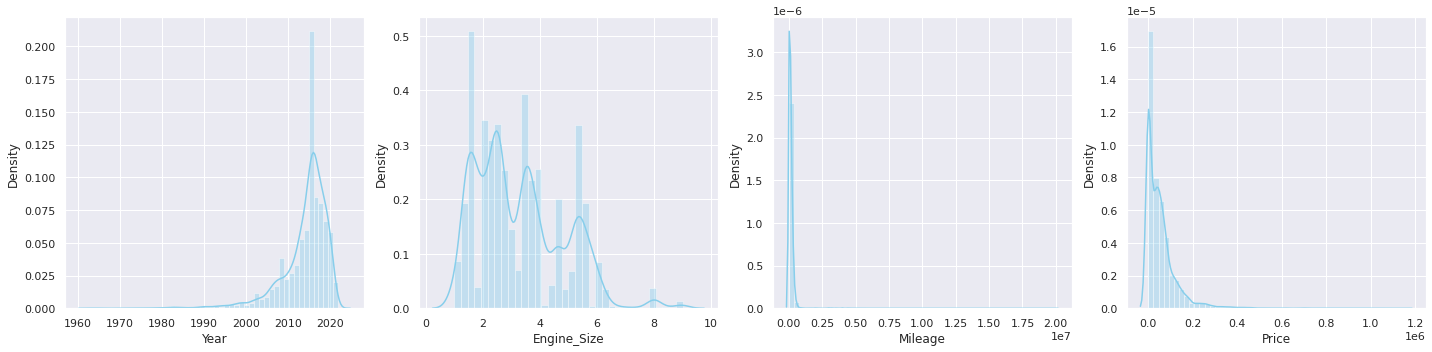

In [ ]:
features = num_var
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=cars[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

Dari sebaran data berikut, untuk data numerical banyak yang tidak terdistribusi normal dan skewed (banyak outliers) sehingga harus ada penanganan khusus untuk data-data numerical.

### **Normality Test**

In [ ]:
# buat copyan dari cars asli
cars_copy = cars.copy()

**Shapiro Wilk test**

In [ ]:
for i in cars_copy[num_var]:
  sw_statistic, sw_pvalue = shapiro(cars_copy[i])

  if sw_pvalue > 0.05:
      print(f'P-value {i}: {sw_pvalue}. normal')
  else:
      print(f'P-value {i}: {sw_pvalue}. not normal')

P-value Year: 0.0. not normal
P-value Engine_Size: 0.0. not normal
P-value Mileage: 0.0. not normal
P-value Price: 0.0. not normal


**D'Agostino and Pearson's test**

In [ ]:
for i in cars_copy[num_var]:
  dp_statistic, dp_pvalue = normaltest(cars_copy[i])

  if dp_pvalue > 0.05:
      print(f'P-value {i}: {dp_pvalue}. normal')
  else:
      print(f'P-value {i}: {dp_pvalue}. not normal')

P-value Year: 0.0. not normal
P-value Engine_Size: 7.842120900538109e-132. not normal
P-value Mileage: 0.0. not normal
P-value Price: 0.0. not normal


Dari visualisasi dan normality test diatas kita dapat mengetahui bahwa data pada numerical features tidak berdistribusi normal. *Sebaran data numerical tidak normal sehingga dibutuhkan proses Scaler agar data bisa dinormalisasi dan bisa meningkatkan performa model*

### **Boxplot**

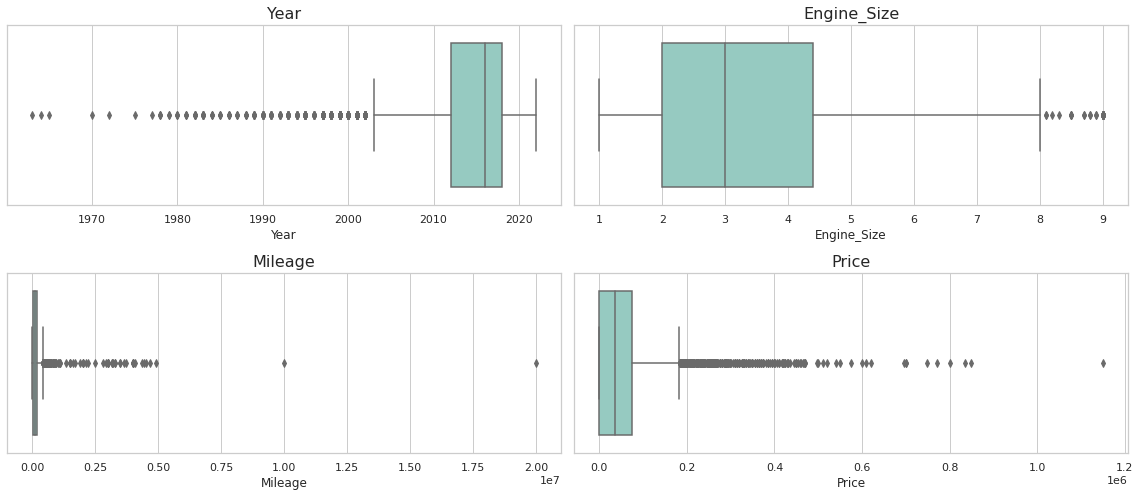

In [ ]:
# Checking Distribusi Numerical Data
plt.figure(figsize=(16,10), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_var:
    ax = plt.subplot(3,2, plotnumber)
    sns.boxplot(x=feature, data=cars)
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

**Year**

Terlihat bahwa distribusi kolom Year adalah skew ke kiri. Untuk outliernya, akan kita coba drop Year < 2000. Distribusi skew kiri ini dapat terjadi karena mayoritas customer mencari mobil bekas keluaran terbaru, hanya segelintir orang saja yang mengoleksi mobil bekas keluaran lama.

**Engine_Size**

Terlihat bahwa distribusi kolom Engine_Size adalah skew ke kanan. Hal ini dapat terjadi karena mayoritas mobil pada data ini memiliki ukuran mesin yang kecil. Untuk Outliernya, kita akan membiarkannya karena hal tersebut memanglah hal yang bisa terjadi didunia nyata.

**Mileage**

Terlihat distribusi skew ke kanan. Terdapat global outlier yang jaraknya lumayan jauh dari data mayoritas. Hasil analisa kita menunjukkan bahwa outlier tersebut dihasilkan oleh mobil Type Optra dan POS24. Untuk outliernya, kita akan drop mobil dengan Mileage > 500000

In [ ]:
cars.sort_values('Mileage', ascending=False)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
7391,Chevrolet,Optra,2009.0,Other,Another Color,Semi Full,1.6,Gas,Manual,20000000.0,Riyadh,9000.0,False
4475,Mercedes,POS24,1983.0,Other,Another Color,Full,8.0,Diesel,Manual,9999999.0,Aseer,0.0,True
5068,Toyota,Aurion,2010.0,Saudi,White,Standard,3.5,Gas,Automatic,4900000.0,Qassim,0.0,True
4675,Chevrolet,Tahoe,2012.0,Saudi,Golden,Semi Full,5.3,Gas,Automatic,4691232.0,Al-Jouf,0.0,True
7525,Toyota,Camry,1998.0,Other,Grey,Full,2.5,Gas,Automatic,4500000.0,Yanbu,15000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6213,GMC,Sierra,2021.0,Saudi,Silver,Full,9.0,Gas,Automatic,100.0,Dammam,178000.0,False
5101,Jeep,Grand Cherokee,1998.0,Saudi,Another Color,Standard,5.7,Gas,Automatic,100.0,Riyadh,0.0,True
5100,Jeep,Compass,2016.0,Saudi,Black,Standard,4.0,Gas,Automatic,100.0,Riyadh,0.0,True
6195,Honda,Other,2005.0,Saudi,Red,Semi Full,4.0,Gas,Manual,100.0,Riyadh,20000.0,False


**Price**

Terlihat bahwa distribusi skew ke kanan. Diketahui bahwa 31% Price bernilai 0, yang nanti akan di isi menggunakan iterative imputer. Untuk outliernya, kita drop Price yang nilainya > 200000

### **Data Correlation**

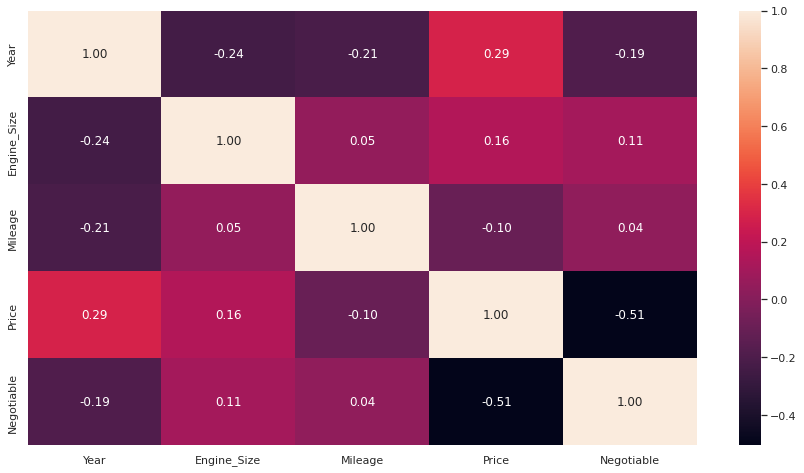

In [ ]:
# Correlation using heatmap
correlation = cars.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Dari heatmap diatas, kita dapat lihat bahwa tidak ada korelasi yang tinggi (>0.8) antar fitur, maka dari itu belum ada fitur yang harus di drop.

### **Variance Inflation Factor (VIF)**

In [ ]:
def calc_vif(dataset):
    vif = pd.DataFrame()
    vif['variabel'] = dataset.columns
    vif['vif'] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
    vif.sort_values(by='vif', ascending=False, inplace=True)
    s = [ i for i in range(len(vif))]
    vif.set_index([s], inplace=True)
    return vif 

In [ ]:
calc_vif(cars_copy[['Year', 'Engine_Size', 'Mileage']].astype(int))

,variabel,vif
0,Year,4.574947
1,Engine_Size,4.467580
2,Mileage,1.186253


Nilai VIF yang lebih besar dari 10 mengindikasikan adanya masalah multikolinearitas yang serius. Karena hasil VIF kita tidak ada yang diatas 10, maka kita akan tetap menggunakan fitur-fitur ini.

## **Hubungan Target dengan Variabel**


### **Scatter Plot**

#### **Year vs Price**

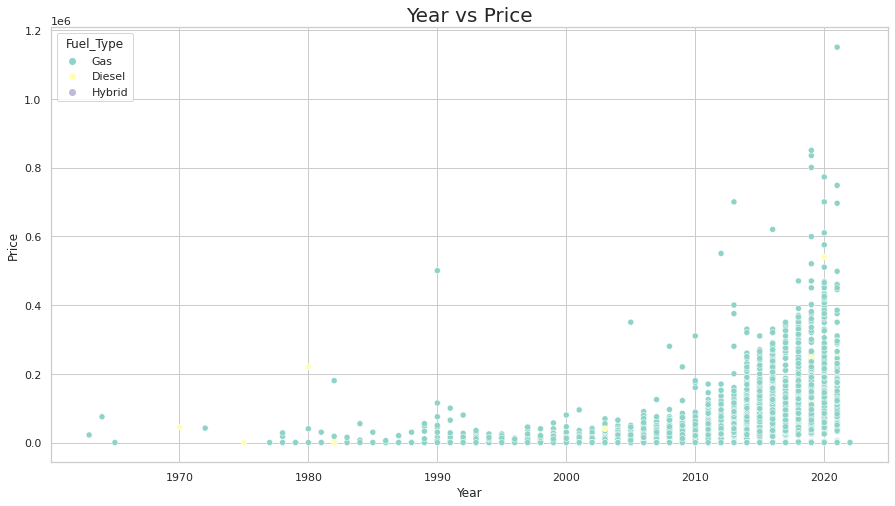

In [ ]:
sns.scatterplot(x=cars['Year'], y=cars['Price'], hue=cars['Fuel_Type'])
plt.title('Year vs Price', size=20);

Terlihat trend kenaikan harga sesuai dengan tahun keluaran mobil.

#### **Engine_Size vs Price**

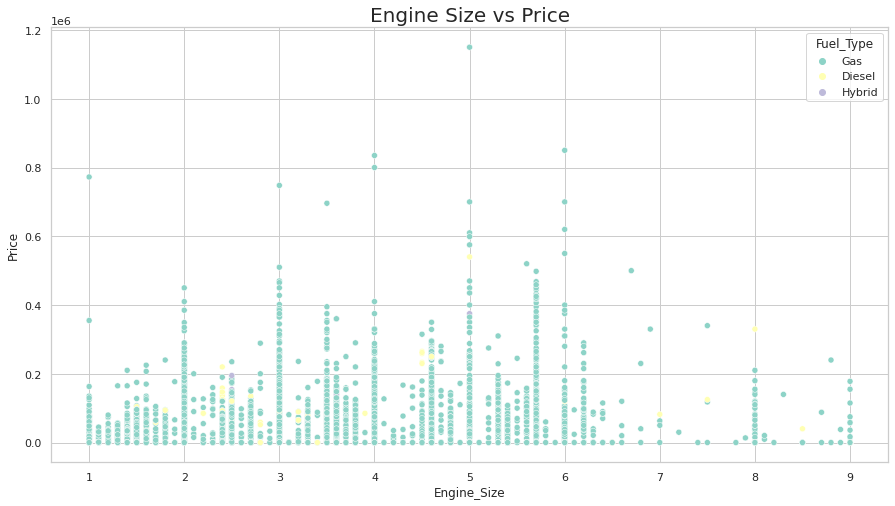

In [ ]:
sns.scatterplot(x=cars['Engine_Size'], y=cars['Price'], hue=cars['Fuel_Type'])
plt.title('Engine Size vs Price', size=20);

Tidak terlihat adanya masalah dari visualisasi diatas.

#### **Mileage vs Price**

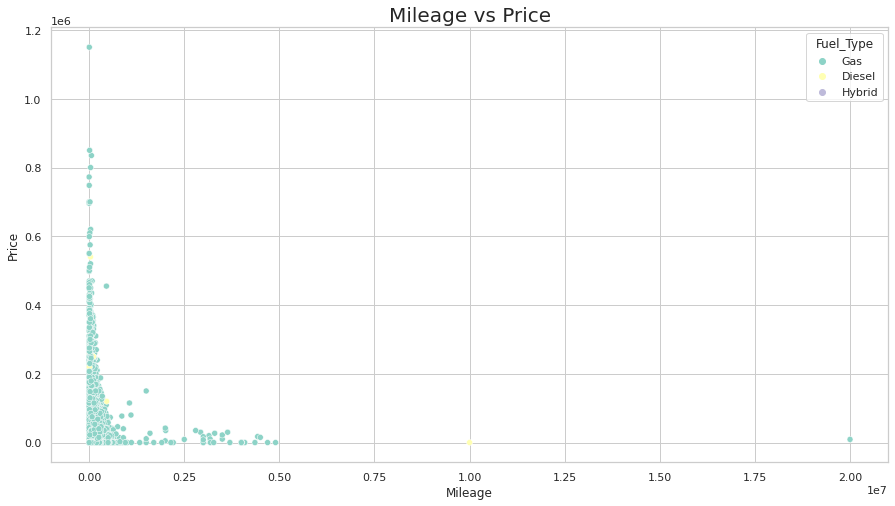

In [ ]:
sns.scatterplot(x=cars['Mileage'], y=cars['Price'], hue=cars['Fuel_Type'])
plt.title('Mileage vs Price', size=20);

Dari visualisasi diatas, terlihat bahwa semakin kecil nilai Mileage nya maka semakin tinggi Price nya.

#### **Region vs Price**

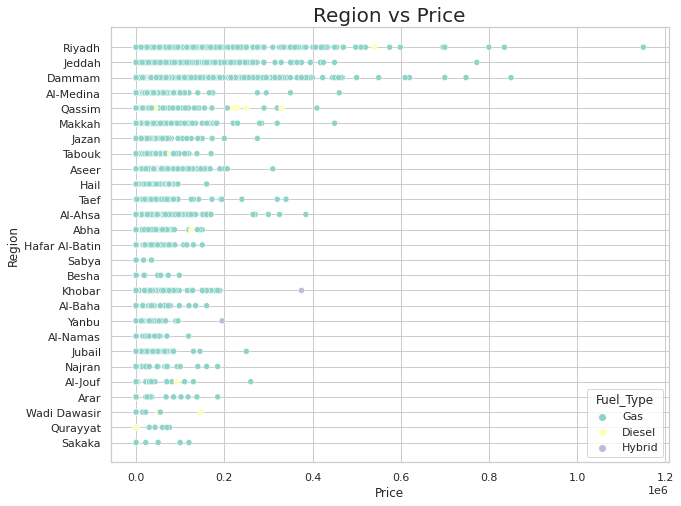

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(y=cars['Region'], x=cars['Price'], hue=cars['Fuel_Type'])
plt.title('Region vs Price', size=20);

Terlihat bahwa mobil dengan Price yang tinggi terdapat pada Region Riyadh, Jeddah, dan Dammam.

#### **Negotiable vs Price**

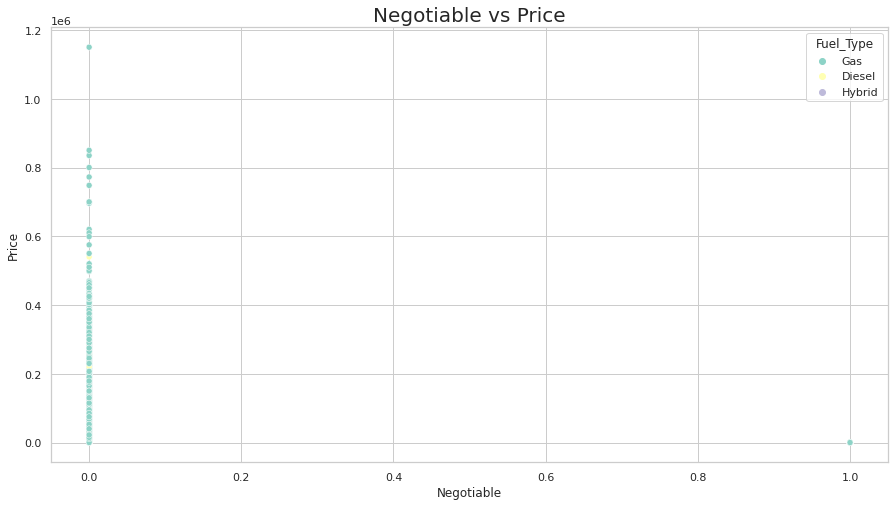

In [ ]:
sns.scatterplot(x=cars['Negotiable'], y=cars['Price'], hue=cars['Fuel_Type'])
plt.title('Negotiable vs Price', size=20);

Terlihat bahwa jika Price mobil bernilai 0, maka mobil tersebut Negotiable.

### Bar Plot

#### **Make vs Price**

<Figure size 1440x432 with 0 Axes>

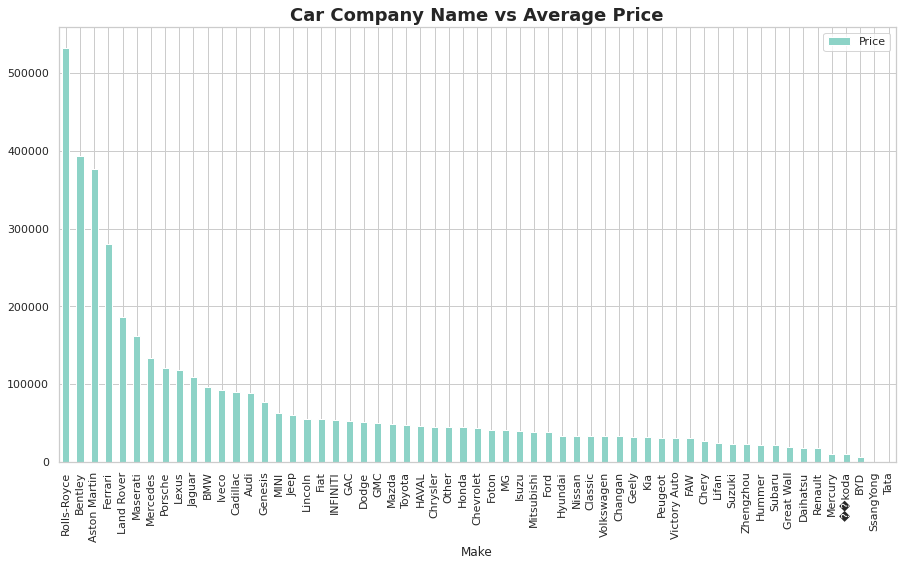

In [ ]:
plt.figure(figsize=(20, 6))

df = pd.DataFrame(cars.groupby(['Make'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Company Name vs Average Price', fontweight = 'bold', fontsize = 18)
plt.show()

#### **Color vs Price**

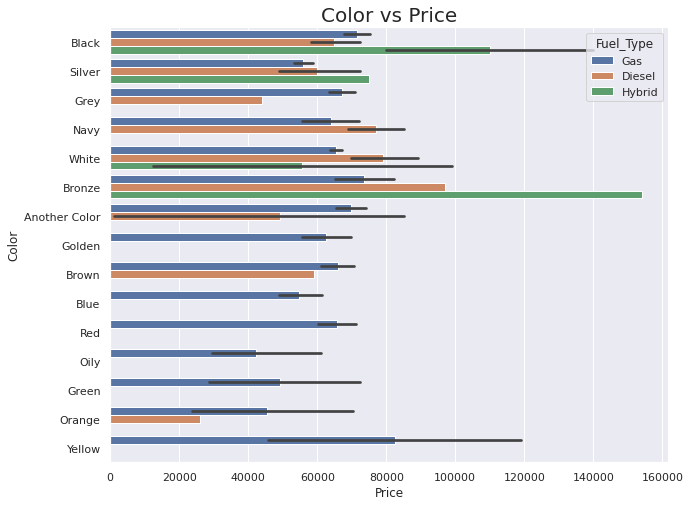

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(y=cars['Color'], x=cars['Price'], hue=cars['Fuel_Type'])
plt.title('Color vs Price', size=20);

## **Data Cardinality**

### **Count Plot**

#### **Make**

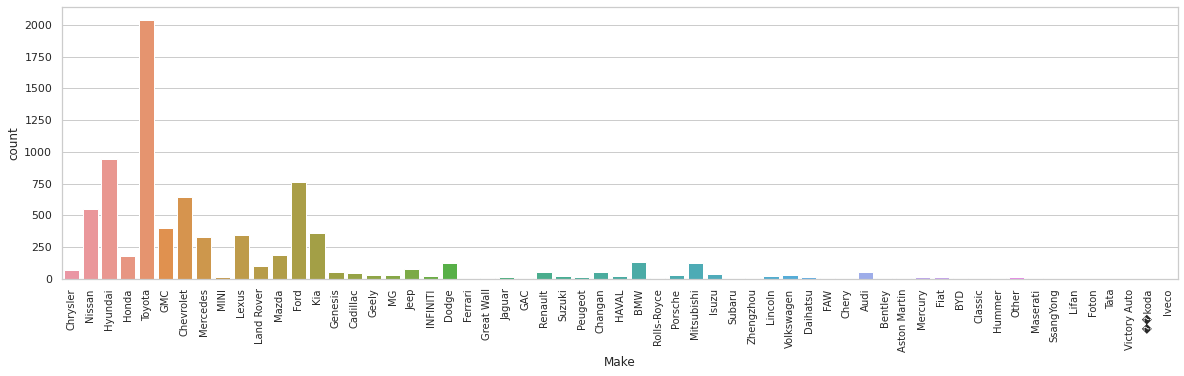

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(cars['Make'])
plt.xticks(size=10, rotation='90');

Data categoric dengan cardinalitas yang tinggi dapat membuat jumlah kolom membengkak jika kita transform menggunakan OneHotEncoder. Untuk itu, fitur 'Make' akan kita encode dengan BinaryEncoder agar tidak terjadi pembengkakkan fitur.

#### **Type**

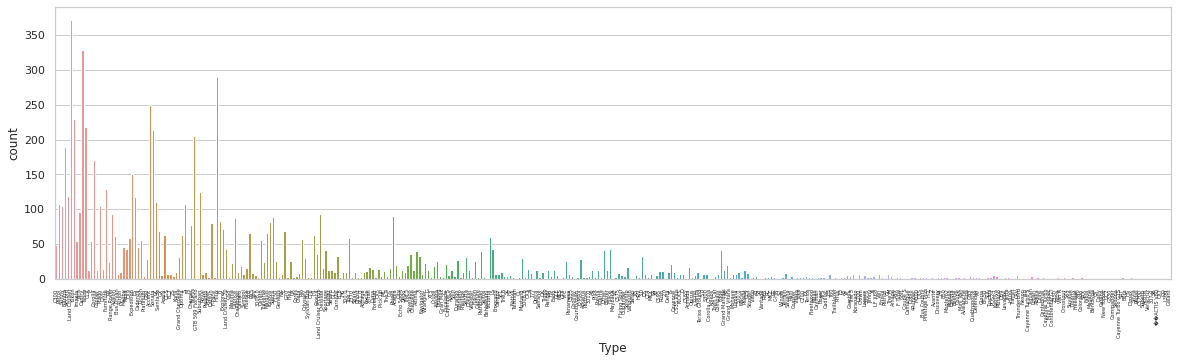

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(cars['Type'])
plt.xticks(size=5, rotation='90');

Sama halnya dengan fitur 'Make', fitur 'Type' juga akan kita encode dengan BinaryEncoder.

#### **Color**

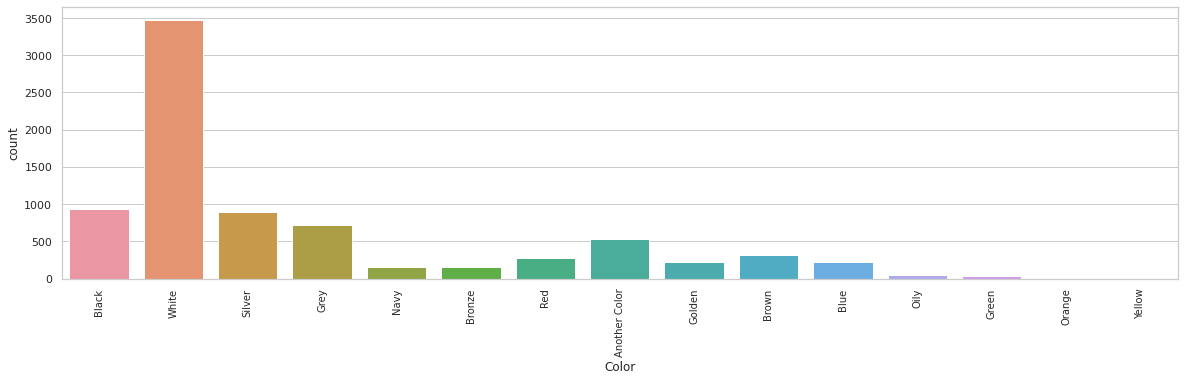

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(cars['Color'])
plt.xticks(size=10, rotation='90');

Fitur 'Color' juga akan kita encode dengan BinaryEncoder.

#### **Region**

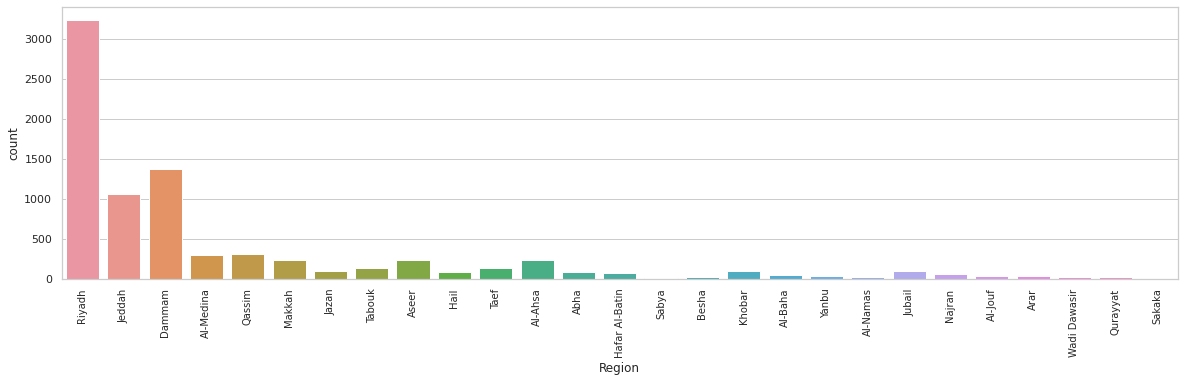

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(cars['Region'])
plt.xticks(size=10, rotation='90');

Fitur 'Region' juga akan kita encode dengan BinaryEncoder.

#### **Origin, Options, Fuel_Type, Gear_Type**

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

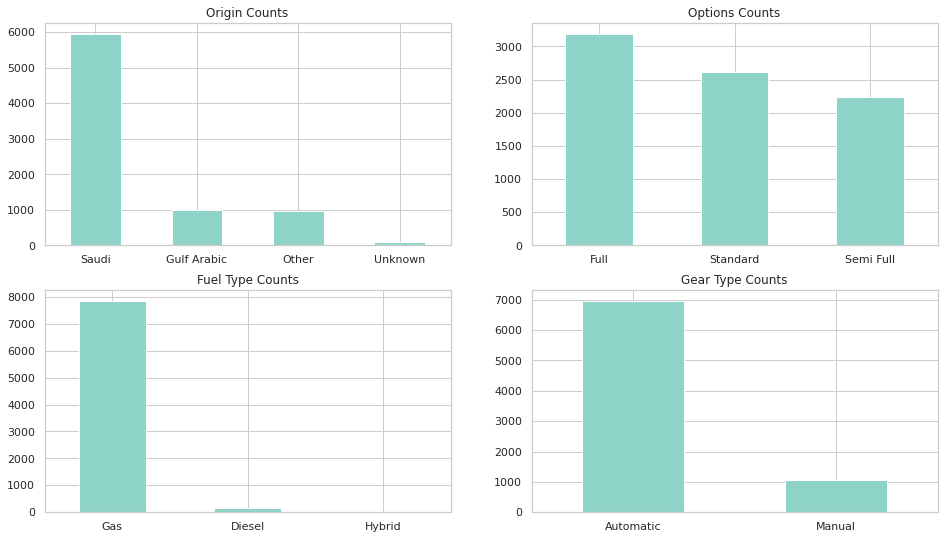

In [ ]:
plt.subplot(221)
cars['Origin'].value_counts().plot(kind='bar', title='Origin Counts', figsize=(16,9))
plt.xticks(rotation=0)
plt.subplot(222)
cars['Options'].value_counts().plot(kind='bar', title='Options Counts', figsize=(16,9))
plt.xticks(rotation=0)
plt.subplot(223)
cars['Fuel_Type'].value_counts().plot(kind='bar', title='Fuel Type Counts')
plt.xticks(rotation=0)
plt.subplot(224)
cars['Gear_Type'].value_counts().plot(kind='bar', title='Gear Type Counts')
plt.xticks(rotation=0)

Pada kolom 'Origin' terdapat class 'Other' dan 'Unknown', class ini sebenarnya adalah missing value. Nantinya kita akan drop class ini. Alasannya karena jika kita impute lalu hasil impute nya tidak tepat, maka hanya akan menjadi noise, dimana hal ini bukanlah hal yang bagus bagi model kita nantinya, hasil prediksi kita menjadi kurang tepat karena model kita belajar dari data yang jelek kualitasnya. Pertimbangan lainnya karena data yang di drop jumlahnya relatif sedikit (1,3%), jadi lebih baik di drop saja.

In [ ]:
# terdapat 981 baris kolom 'Origin' berkategori 'Other'
cars[cars['Origin'] == 'Other'].shape[0]

981

In [ ]:
# terdapat 86 baris kolom 'Origin' berkategori 'Unknown'
cars[cars['Origin'] == 'Unknown'].shape[0]

86

#### **Year**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text major ticklabel objects>)

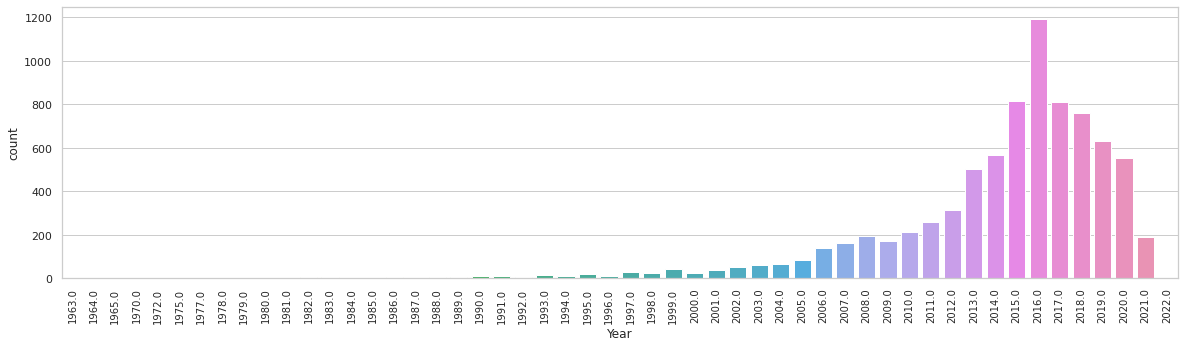

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(cars['Year'])
plt.xticks(size=10, rotation='90')

Data kita didominasi oleh mobil-mobil keluaran tahun 2000 keatas.

In [ ]:
# terdapat 241 mobil dengan keluaran tahun 2000 kebawah
cars[cars['Year'] < 2000]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
41,Toyota,Land Cruiser,1993.0,Saudi,Bronze,Semi Full,4.6,Gas,Manual,400.0,Tabouk,12000.0,False
93,Nissan,Patrol,1992.0,Saudi,White,Standard,4.6,Gas,Manual,357000.0,Dammam,27000.0,False
114,Toyota,Land Cruiser 70,1982.0,Saudi,Another Color,Standard,4.0,Gas,Manual,200000.0,Makkah,0.0,True
284,Toyota,Cressida,1996.0,Saudi,White,Semi Full,2.4,Gas,Manual,8000.0,Aseer,13000.0,False
371,Toyota,Land Cruiser,1997.0,Gulf Arabic,Bronze,Full,6.0,Gas,Automatic,30000.0,Besha,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7848,Nissan,Patrol,1998.0,Gulf Arabic,White,Full,4.5,Gas,Automatic,595000.0,Taef,20000.0,False
7902,Ford,Victoria,1999.0,Saudi,Another Color,Semi Full,1.0,Gas,Automatic,4000.0,Riyadh,10000.0,False
7927,Daihatsu,Delta,1997.0,Saudi,Black,Standard,1.0,Gas,Manual,200.0,Taef,0.0,True
7937,Nissan,Patrol,1990.0,Gulf Arabic,Golden,Semi Full,8.0,Gas,Manual,300000.0,Al-Namas,0.0,True


#### **Toyota, Hyundai, Ford**

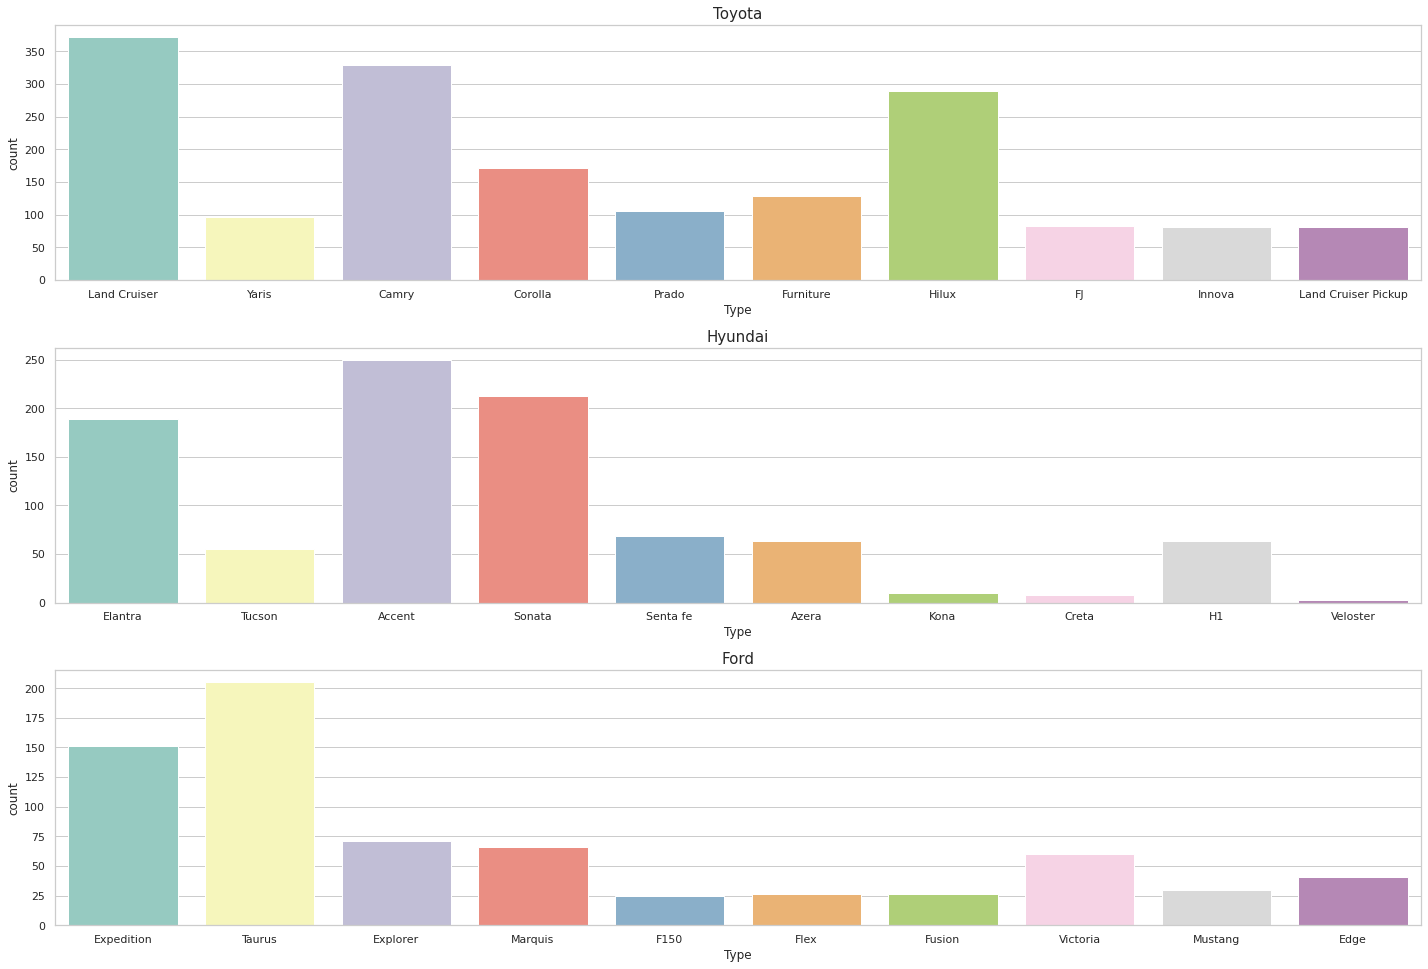

In [ ]:
plt.figure(figsize=(20,40))
for i in enumerate(['Toyota', 'Hyundai', 'Ford']):
    plt.tight_layout()
    plt.subplot(9,1,i[0]+1)
    plt.title(i[1], size=15)
    sns.countplot(
    cars[(cars['Make'] == i[1]) & (cars['Type'].isin(list(dict(cars[(cars['Make'] == i[1])]['Type'].value_counts().head(10)).keys())))]['Type']
    )

'Make' atau perusahaan pembuat mobil terbesar pada data ini adalah Toyota, Hyundai, dan Ford. Dengan Type terbanyaknya secara berurutan ada pada Land Cruisser, Accent, dan Taurus. 

## **Missing Value, Outlier, and Duplicate.**

#### **Missing Values**

In [ ]:
# missing values
cars.isna().sum()

Make           0
Type           0
Year           0
Origin         0
Color          0
Options        0
Engine_Size    0
Fuel_Type      0
Gear_Type      0
Mileage        0
Region         0
Price          0
Negotiable     0
dtype: int64

#### **Outliers**

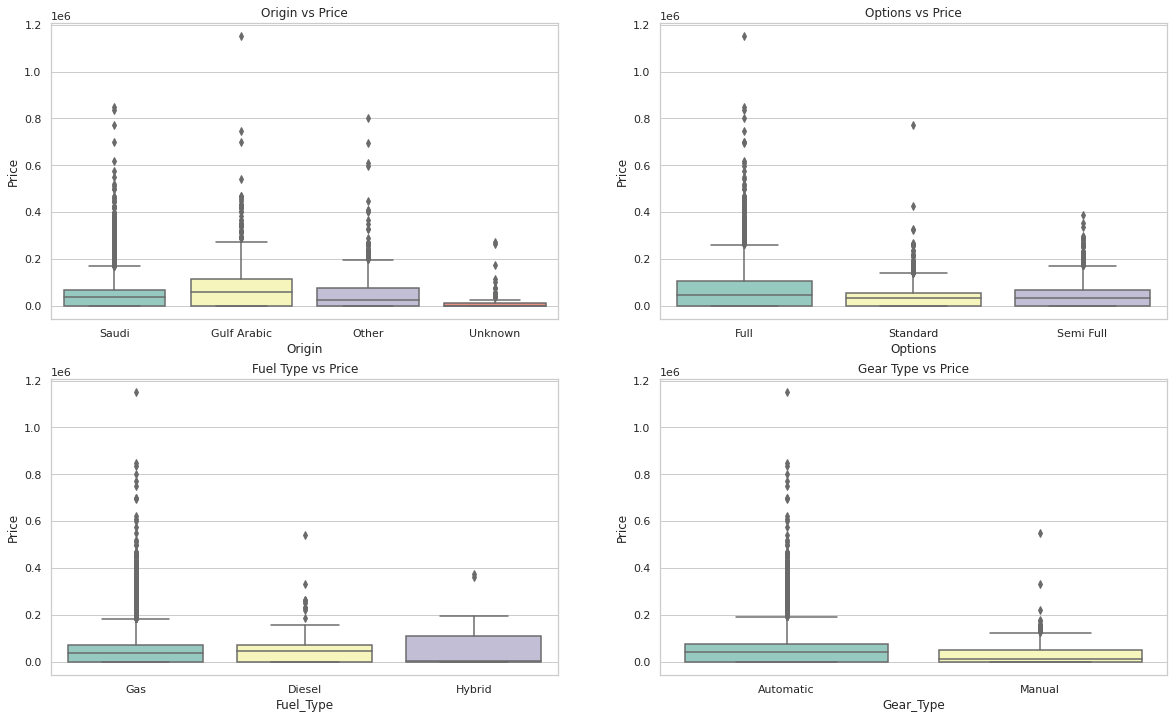

In [ ]:
#melihat data outlier menggunakan ploting boxplot terhadap data price
plt.figure(figsize=(20, 12))

plt.subplot(221)
sns.boxplot(x = 'Origin', y=cars['Price'], data = cars)
plt.title('Origin vs Price')

plt.subplot(222)
sns.boxplot(x = 'Options', y=cars['Price'], data = cars)
plt.title('Options vs Price')

plt.subplot(223)
sns.boxplot(x = 'Fuel_Type', y=cars['Price'], data = cars)
plt.title('Fuel Type vs Price')

plt.subplot(224)
sns.boxplot(x = 'Gear_Type', y=cars['Price'], data = cars)
plt.title('Gear Type vs Price');

Text(0.5, 1.0, 'Origin vs Price')

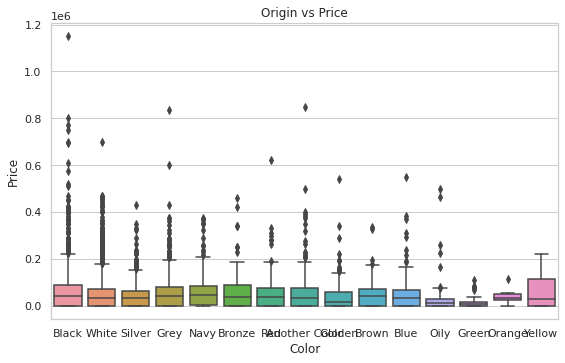

In [ ]:
#melihat data outlier menggunakan ploting boxplot terhadap data price
plt.figure(figsize=(20, 12))

plt.subplot(221)
sns.boxplot(x = 'Color', y=cars['Price'], data = cars)
plt.title('Origin vs Price')


Dari boxplot beberapa data yang ditampilkan, terlihat banyak sekali outliers yang harus ditangani. 

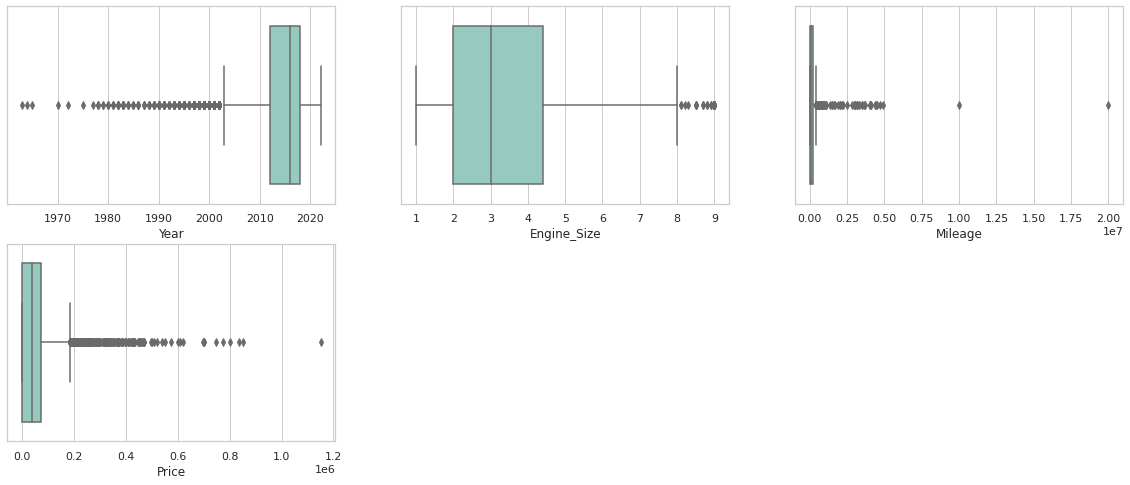

In [ ]:
plt.figure(figsize=(20,8))
for i in enumerate(num_var):
  plt.subplot(2,3,i[0]+1)
  sns.boxplot(cars[i[1]]);

Untuk data numerical juga, outliers banyak sekali disini sehingga harus ada penanganan untuk outliers.

**Berikut adalah penanganan untuk outliers dengan mengambil data yang berada dalam interquartile**

In [ ]:
# IQR function
def iqr(datacolumn):
    sorted(datacolumn)
    Q1,Q2,Q3 = np.percentile(datacolumn , [25,50,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return pd.DataFrame({
    'attribute':['lower_bound', 'Q1', 'Q2','Q3','upper_bound', 'IQR'],
    'result':[lower_bound,Q1,Q2,Q3,upper_bound,IQR ]
})

In [ ]:
iqr(cars['Mileage'])

,attribute,result
0,lower_bound,-200000.0
1,Q1,37000.0
2,Q2,101960.0
3,Q3,195000.0
4,upper_bound,432000.0
5,IQR,158000.0


In [ ]:
cars[cars['Mileage'] > 432000]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
111,Chevrolet,Suburban,2001.0,Other,Grey,Semi Full,5.3,Gas,Automatic,500000.0,Riyadh,15000.0,False
150,Nissan,Maxima,2017.0,Saudi,Grey,Full,1.0,Gas,Automatic,860000.0,Riyadh,77000.0,False
181,Toyota,Land Cruiser,2012.0,Saudi,Grey,Full,1.0,Gas,Automatic,448000.0,Riyadh,109000.0,False
185,GMC,Yukon,2011.0,Saudi,Silver,Semi Full,1.0,Gas,Automatic,600000.0,Riyadh,36000.0,False
217,Toyota,Land Cruiser,2003.0,Saudi,Golden,Full,4.6,Gas,Automatic,629000.0,Riyadh,40000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,Toyota,Land Cruiser,2015.0,Saudi,White,Full,4.6,Gas,Automatic,1500000.0,Riyadh,150000.0,False
7973,Toyota,Camry,2010.0,Saudi,Another Color,Standard,2.0,Gas,Manual,550000.0,Jeddah,20000.0,False
8009,GMC,Suburban,2006.0,Saudi,Golden,Semi Full,5.2,Gas,Automatic,500000.0,Jeddah,14000.0,False
8021,Ford,Explorer,2010.0,Other,Black,Semi Full,1.6,Gas,Automatic,3275230.0,Al-Baha,0.0,True


In [ ]:
iqr(cars['Year'])

,attribute,result
0,lower_bound,2003.0
1,Q1,2012.0
2,Q2,2016.0
3,Q3,2018.0
4,upper_bound,2027.0
5,IQR,6.0


In [ ]:
cars[cars['Year'] < 2003]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
41,Toyota,Land Cruiser,1993.0,Saudi,Bronze,Semi Full,4.6,Gas,Manual,400.0,Tabouk,12000.0,False
93,Nissan,Patrol,1992.0,Saudi,White,Standard,4.6,Gas,Manual,357000.0,Dammam,27000.0,False
111,Chevrolet,Suburban,2001.0,Other,Grey,Semi Full,5.3,Gas,Automatic,500000.0,Riyadh,15000.0,False
114,Toyota,Land Cruiser 70,1982.0,Saudi,Another Color,Standard,4.0,Gas,Manual,200000.0,Makkah,0.0,True
284,Toyota,Cressida,1996.0,Saudi,White,Semi Full,2.4,Gas,Manual,8000.0,Aseer,13000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,Ford,Victoria,1999.0,Saudi,Another Color,Semi Full,1.0,Gas,Automatic,4000.0,Riyadh,10000.0,False
7927,Daihatsu,Delta,1997.0,Saudi,Black,Standard,1.0,Gas,Manual,200.0,Taef,0.0,True
7937,Nissan,Patrol,1990.0,Gulf Arabic,Golden,Semi Full,8.0,Gas,Manual,300000.0,Al-Namas,0.0,True
7947,Toyota,Hilux,1993.0,Gulf Arabic,White,Full,2.4,Gas,Manual,25000.0,Jazan,0.0,True


In [ ]:
iqr(cars['Price'])

,attribute,result
0,lower_bound,-110625.0
1,Q1,0.0
2,Q2,37000.0
3,Q3,73750.0
4,upper_bound,184375.0
5,IQR,73750.0


In [ ]:
cars[cars['Price'] > 184375]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
13,Mercedes,CLA,2020.0,Other,White,Standard,2.0,Gas,Automatic,20000.0,Riyadh,235000.0,False
14,Mercedes,E,2017.0,Saudi,Grey,Full,2.0,Gas,Automatic,20600.0,Dammam,210000.0,False
25,Land Rover,Range Rover,2014.0,Saudi,Black,Full,3.0,Gas,Automatic,80000.0,Makkah,230000.0,False
73,Lexus,ES,2019.0,Saudi,Another Color,Full,3.5,Gas,Automatic,26000.0,Jeddah,207000.0,False
82,Mercedes,S,2018.0,Saudi,Grey,Full,3.0,Gas,Automatic,73000.0,Riyadh,345000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7619,Jeep,Wrangler,2020.0,Gulf Arabic,Black,Semi Full,3.6,Gas,Automatic,4000.0,Dammam,190000.0,False
7681,Other,Other,1980.0,Other,Yellow,Standard,2.4,Diesel,Manual,2500.0,Qassim,220000.0,False
7814,Ford,Expedition,2021.0,Saudi,Another Color,Semi Full,1.6,Gas,Automatic,2500.0,Aseer,207000.0,False
7836,BMW,The 7,2018.0,Saudi,Navy,Semi Full,6.8,Gas,Automatic,18000.0,Riyadh,230000.0,False


In [ ]:
iqr(cars['Engine_Size'])

,attribute,result
0,lower_bound,-1.6
1,Q1,2.0
2,Q2,3.0
3,Q3,4.4
4,upper_bound,8.0
5,IQR,2.4


In [ ]:
cars[cars['Engine_Size'] > 7.0]

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
257,GMC,Yukon,2011.0,Saudi,White,Full,8.0,Gas,Automatic,200.0,Taef,70000.0,False
285,Lexus,LX,2018.0,Gulf Arabic,Golden,Full,7.5,Gas,Automatic,122000.0,Taef,340000.0,False
361,Ford,F150,2017.0,Other,Grey,Full,8.0,Gas,Automatic,140000.0,Riyadh,145000.0,False
461,Mercedes,G,2015.0,Saudi,White,Full,8.8,Gas,Automatic,213000.0,Riyadh,240000.0,False
610,Toyota,FJ,2017.0,Saudi,White,Full,7.5,Gas,Automatic,138000.0,Aseer,118000.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,Toyota,Land Cruiser,2016.0,Saudi,White,Full,8.0,Gas,Automatic,119000.0,Najran,0.0,True
7890,Toyota,FJ,2014.0,Saudi,Silver,Full,9.0,Gas,Automatic,308000.0,Hail,75000.0,False
7905,Ford,Taurus,2015.0,Saudi,Grey,Semi Full,8.0,Gas,Automatic,219819.0,Aseer,0.0,True
7937,Nissan,Patrol,1990.0,Gulf Arabic,Golden,Semi Full,8.0,Gas,Manual,300000.0,Al-Namas,0.0,True


#### **Duplicate**

In [ ]:
# duplicate rows
cars.duplicated().sum()

3

In [ ]:
# see duplicated rows
cars[cars.duplicated(keep=False)].sort_values('Price').head(20)

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
4272,Toyota,Camry,2013.0,Saudi,White,Full,2.5,Gas,Automatic,185000.0,Riyadh,0.0,True
5070,Toyota,Camry,2013.0,Saudi,White,Full,2.5,Gas,Automatic,185000.0,Riyadh,0.0,True
1354,Ford,Taurus,2015.0,Other,Red,Full,3.5,Gas,Automatic,122000.0,Dammam,69000.0,False
2027,Ford,Taurus,2015.0,Other,Red,Full,3.5,Gas,Automatic,122000.0,Dammam,69000.0,False
1387,Ford,Taurus,2019.0,Other,Red,Semi Full,3.5,Gas,Automatic,108000.0,Dammam,97000.0,False
3201,Ford,Taurus,2019.0,Other,Red,Semi Full,3.5,Gas,Automatic,108000.0,Dammam,97000.0,False


Terdapat 3 rows yang terduplikasi, namun kita tidak akan drop rows yang terduplikasi ini, karena memang didunia nyata hal ini bisa saja terjadi. Misal, kita ingin menjual mobil 'A' dengan harga 185000 riyal, tentu saja yang ingin menjual mobil 'A' dengan harga 185000 riyal bukan hanya kita saja, kebetulan seperti itu bisa saja terjadi.

# **Preprocessing**

In [ ]:
cars

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018.0,Saudi,Black,Full,5.7,Gas,Automatic,103000.0,Riyadh,114000.0,False
1,Nissan,Patrol,2016.0,Saudi,White,Full,4.8,Gas,Automatic,5448.0,Riyadh,0.0,True
2,Nissan,Sunny,2019.0,Saudi,Silver,Standard,1.5,Gas,Automatic,72418.0,Riyadh,27500.0,False
3,Hyundai,Elantra,2019.0,Saudi,Grey,Standard,1.6,Gas,Automatic,114154.0,Riyadh,43000.0,False
4,Hyundai,Elantra,2019.0,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912.0,Riyadh,59500.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8030,Audi,A6,2015.0,Saudi,Silver,Full,3.0,Gas,Automatic,77000.0,Riyadh,75000.0,False
8031,Chevrolet,Camaro,2010.0,Saudi,Silver,Full,3.6,Gas,Automatic,150000.0,Riyadh,53000.0,False
8032,Toyota,Land Cruiser,2013.0,Gulf Arabic,White,Full,4.6,Gas,Automatic,260.0,Najran,0.0,True
8033,Nissan,Altima,2011.0,Saudi,Silver,Full,2.5,Gas,Automatic,18500.0,Aseer,22000.0,False


#### **Data Cleansing**

Di model ini kita:


*   drop outlier 'Price', 'Year', 'Mileage', dan 'Engine_Size'
*   drop Price = 0 



In [ ]:
# Drop outlier 'Price'

cars = cars[cars['Price'] < 184375]

In [ ]:
# Drop outlier 'Year'

cars = cars[cars['Year'] > 2003]

In [ ]:
# Drop outlier 'Mileage'

cars = cars[cars['Mileage'] < 432000]

In [ ]:
# Drop outlier 'Engine_Size'

cars = cars[cars['Engine_Size'] < 7.0]

In [ ]:
# Drop Price 0

cars = cars[cars['Price'] > 0]

In [ ]:
cars.describe()

,Year,Engine_Size,Mileage,Price
count,4823.000000,4823.000000,4823.000000,4823.000000
mean,2015.447854,3.034398,122641.229733,65167.116318
std,3.454529,1.357695,94069.699627,39497.871524
min,2004.000000,1.000000,100.000000,1.000000
25%,2014.000000,2.000000,53000.000000,36000.000000
50%,2016.000000,2.700000,104000.000000,56500.000000
75%,2018.000000,3.800000,179000.000000,85000.000000
max,2021.000000,6.800000,426000.000000,183000.000000


Berdasarkan analisis terhadap outliers yang kita lakukan, maka kita akan drop beberapa data. Sekarang mari kita lihat persebaran data yang baru.

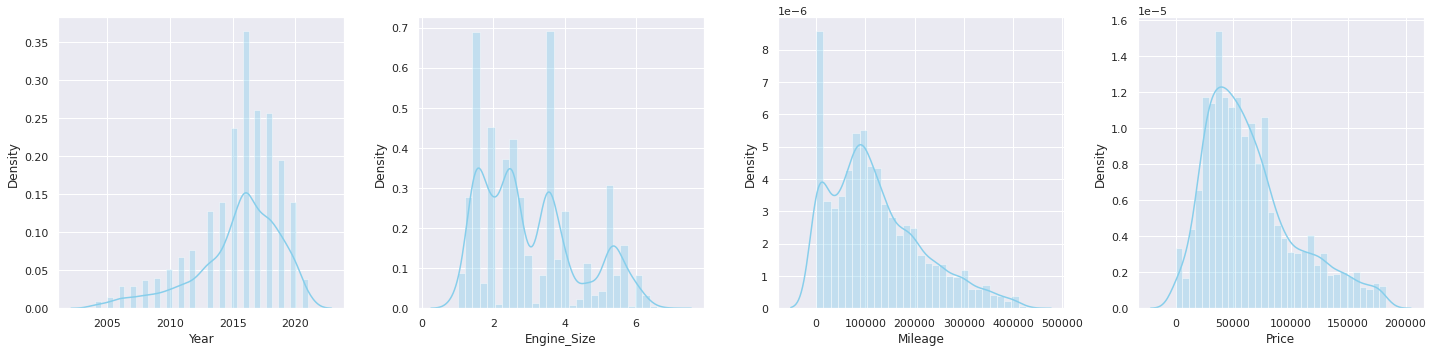

In [ ]:
features = num_var
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    #plt.subplot(2, len(features)//2, i+1)
    plt.subplot(1, len(features), i+1)
    sns.distplot(x=cars[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

> # **Feature Engineering**

## **Numerical Data**

Untuk data numerical, kita akan menggunakan semua data nya karena secara korelasi dan multicolinearity check, semua data numerical tidak ada masalah sehingga tidak perlu kita drop. Tidak ada independent variable yang mempengaruhi independent variable yang lainnya. Jadi, kita akan menggunakan semua data numerical yang tersedia pada data. Berikut hasil uji multikolinearitas data menggunakan VIF.

In [ ]:
calc_vif(cars_copy[['Year', 'Engine_Size', 'Mileage']].astype(int))

,variabel,vif
0,Year,4.574947
1,Engine_Size,4.467580
2,Mileage,1.186253


## **Categorical Data**

Untuk membuat model dengan performa yang optimal, maka kami memutuskan untuk mengurangi beberapa column yang median dari datanya dinilai hampir sama.

#### **Origin dan Region**

Dari beberapa jurnal yang kami dapatkan, ada satu jurnal yang bisa menggambarkan fitur-fitur yang penting yang mempengaruhi harga suatu mobil bekas di pasaran. Berikut adalah link nya https://dergipark.org.tr/tr/download/article-file/402688.

Dari jurnal yang kami dapatkan, disimpulkan bahwa *Location* adalah faktor yang tidak signifikan terhadap harga mobil bekas yang ada di pasaran. Maka dari hasil penelitian ini sudah kuat bahwa fitur "Region" dan "Origin" akan kami drop berdasarkan *Domain Knowledge* yang kami dapatkan.

In [ ]:
cars = cars.drop(columns = ['Origin', 'Region'])

#### **Color**

Dari jurnal yang sama, warna dari mobil digolongkan sebagai variabel yang tidak terlalu berpengaruh terhadap harga mobil. Dikatakan bahwa *color* tidak menjadi faktor utama penentu harga mobil, tetapi *color* hanya memiliki interaksi dengan faktor-faktor lainnya. Sehingga, dari hal ini *color* bisa kita drop.

In [ ]:
cars = cars.drop(columns = ["Color"])

#### **Fuel Type**

Kami ingin melihat apakah Fuel_Type bisa di drop karena dari EDA yang kami lakukan sebelumnya, persebaran data Fuel_type vs Price lumayan hampir seragam sehingga kami berasumsi Fuel_Type seharusnya di drop. Maka dari itu untuk menguatkan asumsi ini, kami melakukan test statistics untuk menguji apakah median dari data data yang ada di fuel type benar-benar sama.

In [ ]:
ft_gas = pd.DataFrame(cars[cars['Fuel_Type'] == 'Gas']['Price'])
ft_diesel = pd.DataFrame(cars[cars['Fuel_Type'] == 'Diesel']['Price'])
ft_hybrid = pd.DataFrame(cars[cars['Fuel_Type'] == 'Hybrid']['Price'])

ft_gas['Price_Gas'] = ft_gas['Price']
ft_diesel['Price_Diesel'] = ft_diesel['Price']
ft_hybrid['Price_Hybrid'] = ft_hybrid['Price']
ft_gas.drop(columns = 'Price', inplace = True)
ft_diesel.drop(columns = 'Price', inplace = True)
ft_hybrid.drop(columns = 'Price', inplace = True)

fuel = [ft_gas, ft_diesel, ft_hybrid]

**Shapiro Wilk test**

In [ ]:
for i in fuel:
  sw_statistic, sw_pvalue = shapiro(i)

  if sw_pvalue > 0.05:
      print(f'P-value {i.columns}: {sw_pvalue}. normal')
  else:
      print(f'P-value {i.columns}: {sw_pvalue}. not normal')

P-value Index(['Price_Gas'], dtype='object'): 2.2154528720975358e-42. not normal
P-value Index(['Price_Diesel'], dtype='object'): 2.209087324445136e-05. not normal
P-value Index(['Price_Hybrid'], dtype='object'): 0.43678227066993713. normal


Dari data diatas maka dapat di check bahwa semua data tidak normal, untuk melihat apakah fitur ini masih memiliki median/mean yang sama maka kita akan mengecek dengan kruskal-wallis

In [ ]:
gas = np.array(ft_gas)
diesel = np.array(ft_diesel)
hybrid = np.array(ft_hybrid)

In [ ]:
from scipy.stats import stats

**Kruskal-Wallis Test**

In [ ]:
H, pval = stats.kruskal(gas, diesel, hybrid)

print("Kruskal Wallis H-test test:")

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

Kruskal Wallis H-test test:
H-statistic: 8.772848157193001
P-Value: 0.012445152633460865
Reject NULL hypothesis - Significant differences exist between groups.


Dari hasil tes statistik yang dihasilkan menggunakan Kruskal-Wallis test dapat disimpulkan bahwa semua fitur pada Fuel_type memiliki median yang sama sehingga tidak berpengaruh pada hasil modelling. **Hal ini mengindikasikan bahwa Fuel_Type dapat kita drop.**

#### **Options**

In [ ]:
cars['Options'].unique()

array(['Full', 'Standard', 'Semi Full'], dtype=object)

In [ ]:
opt_full = pd.DataFrame(cars[cars['Options'] == 'Full']['Price'])
opt_standard = pd.DataFrame(cars[cars['Options'] == 'Standard']['Price'])
opt_semi = pd.DataFrame(cars[cars['Options'] == 'Semi Full']['Price'])


In [ ]:
options = [opt_full, opt_standard, opt_semi]

 **Saphiro Wilk Test**

In [ ]:
for i in options:
  sw_statistic, sw_pvalue = shapiro(i)

  if sw_pvalue > 0.05:
      print(f'P-value {i.columns}: {sw_pvalue}. normal')
  else:
      print(f'P-value {i.columns}: {sw_pvalue}. not normal')

P-value Index(['Price'], dtype='object'): 1.8526374519107818e-19. not normal
P-value Index(['Price'], dtype='object'): 6.781651723188371e-33. not normal
P-value Index(['Price'], dtype='object'): 6.013416755869134e-22. not normal


Dari data diatas maka dapat di check bahwa semua data tidak normal, untuk melihat apakah fitur ini masih memiliki median/mean yang sama maka kita akan mengecek dengan kruskal-wallis.

**Kruskal Wallis**

In [ ]:
H, pval = stats.kruskal(opt_full, opt_standard, opt_semi)

print("Kruskal Wallis H-test test:")

print("H-statistic:", H)
print("P-Value:", pval)

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

Kruskal Wallis H-test test:
H-statistic: 466.415892256546
P-Value: 5.236919046149104e-102
Reject NULL hypothesis - Significant differences exist between groups.


Dari test statistik yang dilakukan untuk options, kita tidak akan drop fitur ini karena dari sini dapat disimpulkan bahwa mean dari masing masing data memiliki perbedaan yang signifikan. Jadi untuk Options akan tetap kita pertahankan.

#### **Gear Type**

Kita ingin menggunakan fitur automatic dan manual untuk permodelan nanti karena dirasa sangat penting dan biasanya harga dari mobil matic dan manual cukup berbeda. Tetapi, kita ingin melakukan test statistics untuk mengetahu dalam case ini apakah median harga dari Automatic dan Manual benar-benar berbeda.


In [ ]:
cars['Gear_Type'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [ ]:
gear_auto = pd.DataFrame(cars[cars['Gear_Type'] == 'Automatic']['Price'])
gear_manual = pd.DataFrame(cars[cars['Gear_Type'] == 'Manual']['Price'])
gear = [gear_auto, gear_manual]

 **Saphiro Wilk Test**

In [ ]:
# Saphiro Wilk Test
for i in gear:
  sw_statistic, sw_pvalue = shapiro(i)

  if sw_pvalue > 0.05:
      print(f'P-value {i.columns}: {sw_pvalue}. normal')
  else:
      print(f'P-value {i.columns}: {sw_pvalue}. not normal')

P-value Index(['Price'], dtype='object'): 1.8868483822133662e-41. not normal
P-value Index(['Price'], dtype='object'): 3.216857058507827e-10. not normal


Dari data diatas maka dapat di check bahwa semua data tidak normal dan dari EDA Gear_Type sekilas terlihat bahwa variance nya berbeda sebagai *Unpaired group*, untuk melihat apakah fitur ini masih memiliki median/mean yang sama maka kita akan mengecek dengan mannwhitney.

In [ ]:
# test stats menggunakan mannwhitney
from scipy.stats import mannwhitneyu

# Mann whitney test
result = list(mannwhitneyu(
    gear_auto,
    gear_manual,
    alternative = 'greater' # M auto > M manual
))

print('U-statistic :', result[0])
print('P-value :', result[1])

U-statistic : 1140068.5
P-value : 7.595352156879929e-07



**Hypothesis**

Ho : Median dari Gear_Type mobil automatic = Median Gear_Type mobil manual

Ha : Median dari Gear_Type mobil automatic > Median Gear_Type mobil manual

Dari test statistics yang dilakukan untuk Gear_type, kita tidak cukup bukti untuk menolak Ho. Atau kita terima Ho. Maka dari itu, median dari automatic dan manual tidak benar-benar berbeda. Sehingga kita bisa drop fitur ini.

In [ ]:
cars = cars.drop(columns = ['Fuel_Type', 'Gear_Type'])

#### **Make**

Data yang terdapat pada Make adalah data Company atau Manufacturer yang membuat mobil-mobil tersebut. Untuk meningkatkan performa model, kami ingin membuat pengelompokkan untuk kelas-kelas mobil yang ada. Hal ini dikarenakan dengan jumlah yang sangat banyak ini, membuat hasil model yang sudah kami test sebelumnya memiliki MAE yang sangat buruk. Sehingga kami memilih untuk memperkecil jumlah data yang ada di Make. Berikut adalah pembuatan klasifikasi terhadap mobil yang ada. Kami mengelompokkan berdasarkan harga mobil. Bisa dilihat dari EDA "Make vs Price".


<Figure size 1440x432 with 0 Axes>

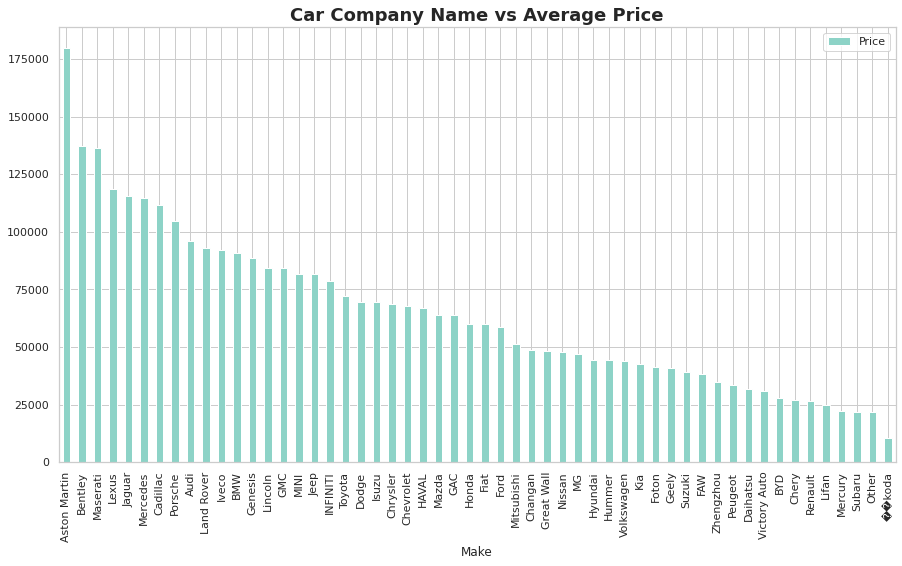

In [ ]:
plt.figure(figsize=(20, 6))

df_make = pd.DataFrame(cars.groupby(['Make'])['Price'].mean().sort_values(ascending = False))
df_make.plot.bar()
plt.title('Car Company Name vs Average Price', fontweight = 'bold', fontsize = 18)
plt.show()

In [ ]:
cars['Make'].unique()

array(['Chrysler', 'Nissan', 'Hyundai', 'Honda', 'Toyota', 'Chevrolet',
       'MINI', 'Lexus', 'GMC', 'Mazda', 'Ford', 'Kia', 'Genesis',
       'Cadillac', 'Geely', 'MG', 'Jeep', 'Mercedes', 'INFINITI', 'Dodge',
       'Great Wall', 'Jaguar', 'Land Rover', 'GAC', 'Renault', 'Suzuki',
       'Peugeot', 'Changan', 'HAVAL', 'BMW', 'Mitsubishi', 'Subaru',
       'Zhengzhou', 'Daihatsu', 'FAW', 'Chery', 'Lincoln', 'Porsche',
       'Isuzu', 'Volkswagen', 'Audi', 'Fiat', 'Mercury', 'Hummer', 'BYD',
       'Maserati', 'Lifan', 'Bentley', 'Foton', 'Aston Martin', 'Other',
       'Victory Auto', '��koda', 'Iveco'], dtype=object)

In [ ]:
cars['Make'].replace({'��koda': 1, 'Mercury': 1, 'Subaru':1, 'Lifan':1, 'Chery':1, 'Renault':1,
                    'BYD':1, 'Victory Auto':1, 'Daihatsu':1, 'Classic':1, 'Peugeot':1, 'Zhengzhou':1,
                    'Suzuki':1, 'FAW':1, 'Geely':1, 'Foton':1, 'Kia':1, 'Volkswagen':1, 'Hummer':1,
                    'Hyundai':1, 'Changan':2, 'Nissan':2, 'Mitsubishi':2, 'MG':2, 'Ford':2, 'Honda':2, 'Fiat':2,
                    'GAC':2, 'Mazda':2, 'HAVAL':2, 'Chevrolet':2, 'Chrysler':2, 'Isuzu':2, 'Dodge':2,
                    'MINI':3, 'INFINITI':3, 'Toyota':3, 'Jeep':3, 'GMC':3, 'Iveco':3, 'Lincoln':3, 
                    'Genesis':3, 'Great Wall':3, 'Other':3, 'Cadillac':4, 'Audi':4, 'BMW':4, 'Jaguar':4, 
                    'Porsche':4, 'Lexus':4, 'Mercedes':4, 'Maserati':5, 'Land Rover':5, 'Ferrari':5, 
                    'Aston Martin':5, 'Bentley':5, 'Rolls-Royce':5}, inplace=True)

In [ ]:
cars['Make'].unique()

array([2, 1, 3, 4, 5])

<Figure size 1440x432 with 0 Axes>

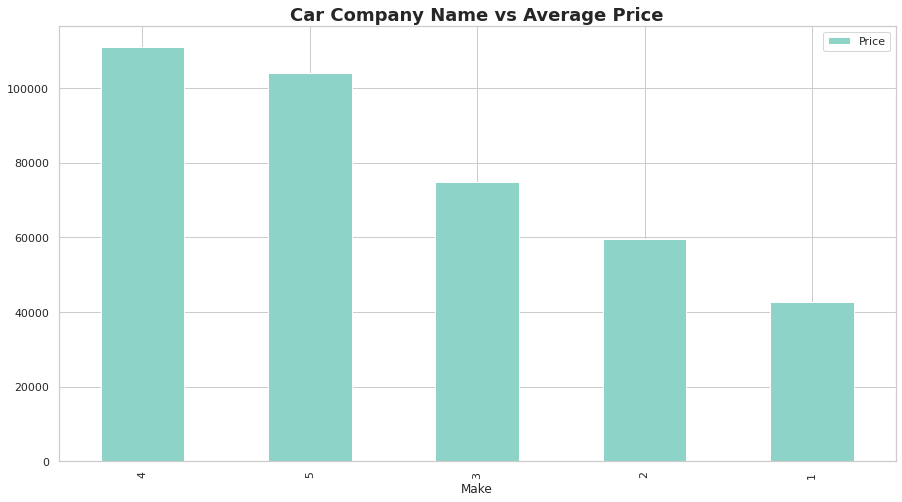

In [ ]:
plt.figure(figsize=(20, 6))

df_make = pd.DataFrame(cars.groupby(['Make'])['Price'].mean().sort_values(ascending = False))
df_make.plot.bar()
plt.title('Car Company Name vs Average Price', fontweight = 'bold', fontsize = 18)
plt.show()

#### **Negotiable**

Karena *Negotiable* dari data yang kita miliki semuanya sama (Semua data = *False*) maka kita akan drop data tersebut karena tidak akan memiliki pengaruh apa-apa terhadap model.

In [ ]:
cars = cars.drop(columns = 'Negotiable')

In [ ]:
cars.head()

,Make,Type,Year,Options,Engine_Size,Mileage,Price
0,2,C300,2018.0,Full,5.7,103000.0,114000.0
2,2,Sunny,2019.0,Standard,1.5,72418.0,27500.0
3,1,Elantra,2019.0,Standard,1.6,114154.0,43000.0
4,1,Elantra,2019.0,Semi Full,2.0,41912.0,59500.0
5,2,Accord,2018.0,Full,1.5,39000.0,72000.0


Dari sini kita sudah mendapatkan data yang sudah bersih dari outliers dan kita juga sudah melakukan drop terhadap beberpa fitur yang dianggap dapat memperburuk hasil model. Sekarang, mari kita melakukan modelling untuk data ini.

 # **Modelling and Cross Validation**

In [ ]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

## **Transformer**


In [ ]:
# Transformasi data
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['Options']),
    ('Binary', ce.BinaryEncoder(), ['Type'])
], remainder='passthrough')

In [ ]:
# Karena range data mileage lumayan besar, maka kita akan melakukan transformasi 
cars['Mileage'] = np.log(cars['Mileage'])

## **Data Splitting**

In [ ]:
# sesuai dengan hasil ctujuan kita untuk melihat prediksi harga, jadi target yang akan dituju adalah feature Price
X = cars.drop(columns= ['Price'])
y = cars['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3858, 6), (965, 6), (3858,), (965,))

In [ ]:
cars['Make'].unique()

array([2, 1, 3, 4, 5])

## **Kandidat Model**

In [ ]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)


# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [ ]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-24947.580458,777.699068,-18434.604633,618.070816,-37.027992,71.436680
1,KNN Regressor,-22019.727874,837.221147,-14536.656575,430.695966,-42.873196,83.564038
2,DecisionTree Regressor,-26611.176785,800.584362,-16001.732327,348.605278,-43.976618,85.539230
3,RandomForest Regressor,-19425.843076,495.628521,-11933.410714,225.550822,-41.868473,81.580527
4,XGBoost Regressor,-20049.849094,645.619020,-13158.255902,214.982642,-40.639740,79.026556


Dari hasil modelling yang dilakukan dengan menyertakan beberapa kandidat model yang mungkin, modelling dengan RandomForest dan XGBoost adalah model terbaik sehingga dengan dua metode ini kita akan melakukan hyperparameter tuning untuk meningkatkan performa model.

## **Benchmark model terbaik**


In [ ]:
# Benchmark  model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []
score_r2 = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))
    score_r2.append(r2_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape, 'r2': score_r2}, index=models.keys())
score_before_tuning

[11:28:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,RMSE,MAE,MAPE,r2
XGB,20252.433550,13888.539951,0.924786,0.742466
RandomForest,18385.436445,12093.552706,0.847446,0.787760


# **Hyperparameter Tuning**



Dari dua model dengan performa terbaik, setelah dilakukan hyperparameter tuning, ternyata model XGBoost yang memberikan hasil MAE terbaik sehinggi kami meilih XGBoost untuk final modelling yang akan kami gunakan. Untuk menghemat waktu loading dan membuat file tetap ringan (GridSearch pada tuning dengan RandomForest), maka kami hanya menampilkan tuning dengan XGBoost.

In [ ]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [ ]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [ ]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Options']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['Type'])])),
                                             ('scaler', StandardScaler()),
                                             ('mode

In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE
pd.DataFrame(random_xgb.cv_results_).sort_values(by='rank_test_neg_root_mean_squared_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.078685,0.023603,0.025503,0.001043,0.9,0.059948,119,8,0.05,5,0.8,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-18647.960077,-18575.557629,-18282.241438,-19676.924333,-18110.399735,-18658.616642,545.190423,1,-11068.054946,-11208.016887,-11722.388934,-11848.885116,-11037.513240,-11376.971825,340.946528,1,-0.958993,-1.108102,-0.959682,-214.713178,-1.174238,-43.782839,85.465211,25
17,1.079037,0.005414,0.023847,0.000458,0.6,0.001,190,5,0.04,9,0.9,"{'model__subsample': 0.6, 'model__reg_alpha': ...",-19092.641499,-18954.065949,-18596.798890,-19848.569754,-18619.859853,-19022.387189,455.046096,2,-12030.816410,-11996.968703,-12205.338274,-12182.385582,-11950.296150,-12073.161024,102.073447,2,-0.992036,-1.115966,-0.993323,-198.593062,-1.206742,-40.580226,79.006459,17
22,0.455323,0.013044,0.020869,0.000925,0.7,0.002783,155,4,0.25,8,0.3,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-18984.620243,-19333.101610,-19119.826092,-20818.305526,-19306.280429,-19512.426780,665.235022,3,-12006.203233,-12869.035980,-12722.922468,-13137.596773,-12491.289921,-12645.409675,382.257210,6,-1.016411,-1.135204,-1.038248,-217.651666,-1.201516,-44.408609,86.621554,27
23,0.701081,0.154696,0.048373,0.027547,0.9,3.593814,153,4,0.33,9,0.3,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-18732.500259,-18998.593546,-19416.252230,-21122.448465,-19494.113159,-19552.781532,832.576987,4,-11971.601439,-12711.133990,-12934.232418,-12943.270893,-12630.098095,-12638.067367,355.089286,5,-0.968941,-1.115432,-1.042717,-236.288739,-1.243070,-48.131780,94.078523,44
24,0.465959,0.009437,0.020440,0.000375,0.9,10.0,146,4,0.06,5,0.4,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-19262.723987,-19441.531415,-18849.727059,-20970.644707,-19423.173290,-19589.560092,722.657115,5,-12531.277949,-12836.072539,-12697.556622,-13512.221706,-12880.230929,-12891.471949,333.427230,9,-1.020912,-1.161733,-1.046262,-207.476048,-1.259362,-42.392863,82.541636,21


In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAE
pd.DataFrame(random_xgb.cv_results_).sort_values(by='rank_test_neg_mean_absolute_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.078685,0.023603,0.025503,0.001043,0.9,0.059948,119,8,0.05,5,0.8,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-18647.960077,-18575.557629,-18282.241438,-19676.924333,-18110.399735,-18658.616642,545.190423,1,-11068.054946,-11208.016887,-11722.388934,-11848.885116,-11037.513240,-11376.971825,340.946528,1,-0.958993,-1.108102,-0.959682,-214.713178,-1.174238,-43.782839,85.465211,25
17,1.079037,0.005414,0.023847,0.000458,0.6,0.001,190,5,0.04,9,0.9,"{'model__subsample': 0.6, 'model__reg_alpha': ...",-19092.641499,-18954.065949,-18596.798890,-19848.569754,-18619.859853,-19022.387189,455.046096,2,-12030.816410,-11996.968703,-12205.338274,-12182.385582,-11950.296150,-12073.161024,102.073447,2,-0.992036,-1.115966,-0.993323,-198.593062,-1.206742,-40.580226,79.006459,17
20,0.580132,0.017492,0.020814,0.001796,0.9,0.007743,143,4,0.38,6,0.8,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-19634.300670,-19119.388853,-20013.925015,-21131.163924,-19800.397387,-19939.835170,664.933063,8,-12150.635895,-12040.875281,-13420.217511,-12485.590073,-12788.114290,-12577.086610,496.619938,3,-1.004151,-1.128629,-0.973536,-230.554168,-1.229582,-46.978013,91.788123,35
8,1.023596,0.003544,0.026868,0.000967,0.7,0.021544,182,6,0.31,2,0.6,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-20136.430247,-19618.357462,-20160.533385,-20619.491713,-19361.963139,-19979.355189,442.439868,9,-12552.720013,-12210.559421,-13344.844250,-12613.171107,-12459.756034,-12636.210165,379.994286,4,-0.963958,-1.107059,-0.995839,-236.004370,-1.208374,-48.055920,93.974265,43
23,0.701081,0.154696,0.048373,0.027547,0.9,3.593814,153,4,0.33,9,0.3,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-18732.500259,-18998.593546,-19416.252230,-21122.448465,-19494.113159,-19552.781532,832.576987,4,-11971.601439,-12711.133990,-12934.232418,-12943.270893,-12630.098095,-12638.067367,355.089286,5,-0.968941,-1.115432,-1.042717,-236.288739,-1.243070,-48.131780,94.078523,44


In [ ]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by='rank_test_neg_mean_absolute_percentage_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,param_model__colsample_bytree,params,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
31,0.728610,0.012317,0.025973,0.000790,0.2,0.002783,171,6,0.66,6,0.5,"{'model__subsample': 0.2, 'model__reg_alpha': ...",-45827.242780,-47258.529574,-47854.878478,-44567.261327,-51560.246311,-47413.631694,2367.767819,48,-33192.756943,-33649.078569,-35301.859595,-32689.099207,-36414.774768,-34249.513816,1393.408623,48,-1.642686,-1.790659,-1.582208,-101.004699,-1.806044,-21.565259,39.719812,1
1,0.267849,0.005727,0.016690,0.001208,0.9,1.29155,180,1,0.07,1,0.1,"{'model__subsample': 0.9, 'model__reg_alpha': ...",-28659.195046,-30462.272514,-27946.872033,-30360.112638,-29034.736564,-29292.637759,978.406476,40,-21362.072393,-23016.734674,-21396.265726,-22247.204164,-22016.209374,-22007.697266,610.945579,40,-1.186006,-1.312749,-1.187651,-129.394161,-1.441973,-26.904508,51.244914,2
33,0.965880,0.032620,0.034097,0.000684,0.7,1.29155,178,10,0.96,1,0.3,"{'model__subsample': 0.7, 'model__reg_alpha': ...",-30323.662107,-31099.651304,-30928.926787,-28713.104206,-28845.120860,-29982.093053,1016.379697,41,-22266.406078,-23402.548801,-23063.798148,-20723.242911,-21125.375386,-22116.274265,1048.547585,41,-1.243701,-1.275330,-1.206170,-141.053536,-1.438253,-29.243398,55.905125,3
49,0.306670,0.019749,0.017542,0.002198,0.3,1.29155,171,7,0.08,1,0.1,"{'model__subsample': 0.3, 'model__reg_alpha': ...",-25864.635449,-27512.791970,-25477.076398,-27846.515149,-26414.659491,-26623.135691,918.736354,35,-18889.690513,-20509.616546,-18732.879290,-19690.833834,-19186.047094,-19401.813455,642.970981,38,-1.153688,-1.289654,-1.179602,-151.696218,-1.378698,-31.339572,60.178377,4
44,0.558461,0.009004,0.025275,0.000927,0.4,0.002783,149,9,0.88,8,0.2,"{'model__subsample': 0.4, 'model__reg_alpha': ...",-36513.860492,-38799.085736,-39150.852099,-33997.401956,-35839.654671,-36860.170991,1916.425913,43,-27159.470318,-28926.817101,-28962.278627,-25162.435938,-26772.482556,-27396.696908,1430.395471,44,-1.434925,-1.670197,-1.439882,-152.236079,-1.579184,-31.672053,60.282078,5


In [ ]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -18658.616642340337
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


## **Predict Test Set with Tuned Model**

In [ ]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,18010.693638,11649.089233,0.835414


## **Comparison**

In [ ]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE,r2
XGB,20252.43355,13888.539951,0.924786,0.742466


In [ ]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,18010.693638,11649.089233,0.835414


Dari hasil Tuning yang dilakukan, model mengalami peningkatan performa (nilai RMSE, MAE, MAPE).

- RMSE, MAE, dan MAPE sebelum tuning: 20.252, 13.888, 0.92
- RMSE, MAE, dan MAPE sesudah tuning: 18.010, 11.650, 0.83

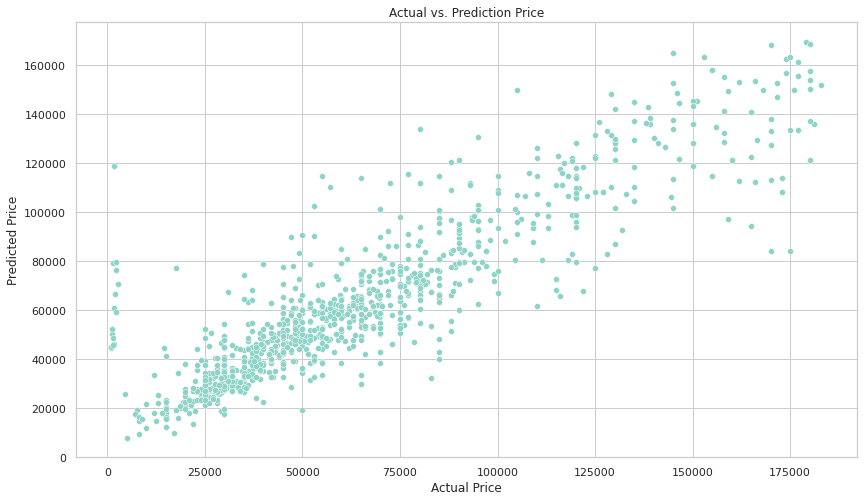

In [ ]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

## **Model Evaluation**


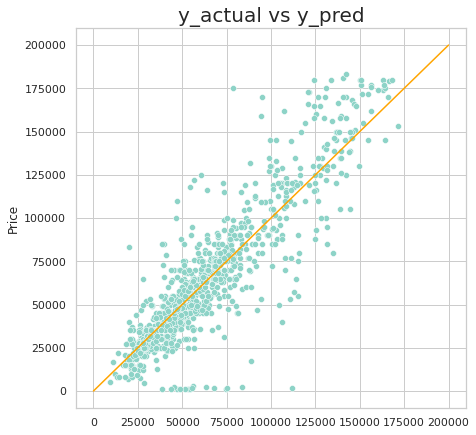

In [ ]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_pred, y=y_test)
plt.title('y_actual vs y_pred', size=20)
point1 = [0, 0]
point2 = [200000, 200000]
x_plot = [point1[0], point2[0]]
y_plot = [point1[1], point2[1]]
plt.plot(x_plot, y_plot, color='orange');

# **Feature Importance**

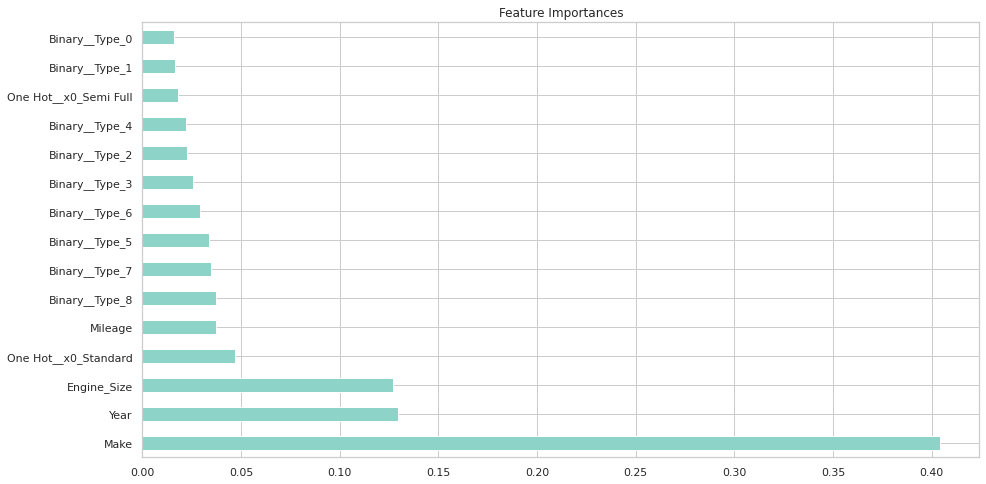

In [ ]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances');

# **Prediksi untuk Range Harga**

Untuk membuat benchmark rentang harga untuk dimasukkan ke website oleh seller, kita akan gunakan cara berikut:

Setelah memasukkan fitur-fitur dari mobil yang ingin dijual, akan keluar harga prediksi dari model yang sudah tersedia. Dari harga yang keluar, seller bisa memasukkan harga kurang lebih sebesar nilai MAE yang didapatkan dari model.

Nilai MAE akan menjadi nilai minimum dan maksimum yang bisa dimasukkan oleh seller. MAE untuk model kali ini adalah kurang lebih 11.650 riyal dari prediksi harga hasil modelling.

Jika suatu mobil ditawarkan kurang dari dibawah rentang kurang lebih 11.650, maka disimpulkan bahwa diluar rentang tersebut harga underpricing atau overpricing. Misalnya, untuk harga mobil superclass yang dimasukkan kedalam model menghasilkan hasil prediksi harga yaitu 100.000 riyal, batas minimum yang boleh dimasukkan oleh seller pada website *Syarah.com* adalah 88.350 riyal dan batas atas 111.650 riyal. Untuk model ini terbatas hanya dengan mobil dengan harga kira-kira sampai dengan 183.000 riyal.

# **Kesimpulan**

Model terbaik dari hasil permodelan dan Hyperparameter Tuning yang sudah dilakukan adalah XGBoost karena menghasilkan hasil akhir MAE yang paling rendah. Dari dua model yang dicoba menggunakan tuning, XGBoost memiliki performa lebih baik daripada RandomForest, sehingga untuk project kali ini yang akan ditampilkan hanya XGBoost saja untuk membuat file menjadi lebih ringan.

Berdasarkan pemodelan yang sudah dilakukan, fitur *Make* atau kelas dari mobil dan *Year* atau tahun keluar mobil menjadi faktor yang paling mempengaruhi harga jual (*Price*) mobil bekas.

1. Semakin mobil digolongkan menjadi kelas yang lebih tinggi, maka harga akan lebih tinggi.
1. Semakin tua tahun keluar mobil, maka harga akan semakin murah. 

Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE, dan MAPE. Jika ditinjau dari MAE yang dihasilkan oleh model setelah dilakukan tuning, yaitu sebesar 11.650 riyal (maksimal 183,000 riyal), maka perkiraan harga yang masih bisa dimasukkan oleh penjual agar harga tidak underpricing atau overpricing adalah dengan tingkat toleansi kurang-lebih 11.650 riyal dari harga yang akan direkomendasikan oleh sistem. 

Nantinya, model dapat menjelaskan berapa rentang harga yang harus dimasukkan oleh seller setelah hasil prediksi dari input atas fitur-fitur yang dimasukkan oleh seller. Berdasarkan proporsi nilai MAE, seller dapat memasukkan harga dengan rentang kurang-lebih 11.650 dari harga prediksi yang dikeluarkan oleh sistem sehingga dengan adanya benchmark tersebut, diharapkan akan dapat meminimalkan underpricing atau overpricing. Tetapi bisa saja harga yang meleset akan menjadi lebih tinggi karena bias yang terdapat pada model cukup tinggi seiring dengan pertambahan nilai aktual dan prediksi. Dengan adanya benchmark harga yang dikeluarkan, hal ini membuat customer yang ingin membeli mobil dapat mendapatkan harga yang tidak terlalu ekstrem antara harga yang ada di website dan yang ditawarkan ketika sudah menghubungi seller. 


# **Rekomendasi**

Beberapa hal bisa dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Bisa dilakukan riset lebih terhadap data ini kenapa MAE dari beberapa kandidat data, dan beberapa kandidat metode machine learning yang digunakan, rata-rata dari error tidak jauh berbeda.

1. Bila memungkinkan, penambahan fitur yang lebih korelatif dan juga data terkini untuk Saudi Arabia Used Cars Dataset tentunya akan meningkatkan performa dari modelling dan kapasitas prediksi. Dari jurnal yang kami dapatkan, ada beberapa faktor yang berpengaruh lebih signifikan terhadap harga mobil bekas seperti *damage condition* dan *engine type*.

1. Dapat dilakukan modeling terbaru dengan peraturan yang sudah ditetapkan dari mobil ini bahwa akan ada batas bawah dan batas atas baru untuk harga yang bisa dimasukkan oleh seller. Hal ini akan mengakibatkan tidak akan ada lagi *price* = 0. Hal ini tentunya akan meningkatkan performa model.

# **Save Model**

In [ ]:
# Save model
import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Saudi_Cars_XGB.sav', 'wb'))

In [ ]:
# # Load model
# filename = 'Saudi_Cars_XGB.sav'
# loaded_model = pickle.load(open(filename, 'rb'))